# HOTEL BOOKING DEMAND

# Business Problem Understanding

## Context
Menjelang akhir tahun, sektor hotel mengalami lonjakan permintaan signifikan akibat musim liburan, promosi akhir tahun, dan acara khusus. Tingginya permintaan ini memberikan peluang besar untuk meningkatkan pendapatan, namun juga memunculkan tantangan operasional seperti memprediksi pembatalan reservasi, mengelola ketersediaan kamar, dan menghindari overbooking.

Berdasarkan data dari artikel MyRobin, tantangan lain yang dihadapi meliputi kompleksitas pengelolaan pesanan, ketidakseimbangan sumber daya manusia, dan risiko kehilangan loyalitas pelanggan akibat pengalaman buruk. Dalam situasi ini, solusi berbasis teknologi yang andal menjadi kebutuhan utama untuk membantu hotel mengoptimalkan operasi dan pendapatan.

## Problem Statement :

Hotel menghadapi kesulitan dalam memprediksi apakah reservasi akan dibatalkan. Hal ini dapat menyebabkan:

False Negative Risk (FN): Tamu yang diprediksi tidak membatalkan ternyata membatalkan, menyebabkan kamar dibiarkan kosong tanpa ada upaya memasarkan ulang.
False Positive Risk (FP): Tamu yang diprediksi membatalkan ternyata tetap datang, mengakibatkan risiko overbooking dan pengalaman pelanggan yang buruk.
Risiko ini sangat signifikan, terutama pada periode lonjakan permintaan, karena dapat berdampak pada hilangnya pendapatan, reputasi hotel, dan loyalitas pelanggan.

## Goals :

Membuat model prediksi pembatalan reservasi dengan nilai recall yang tinggi untuk mengurangi False Negative Rate.
Menyediakan wawasan operasional bagi hotel untuk memitigasi risiko akibat pembatalan, seperti memasarkan kembali kamar kosong.
Mengelola False Positive Rate secara optimal untuk menghindari overbooking dan menjaga reputasi hotel.
Memberikan solusi berbasis data untuk mendukung keputusan strategis dalam pengelolaan reservasi.

## Analytic Approach :

1. Data Exploration:
Analisis pola pembatalan berdasarkan fitur seperti segmen pasar, jenis deposit, dan riwayat pembatalan.
Identifikasi potensi ketidakseimbangan kelas pada variabel target (is_canceled).
2. Data Preprocessing:
Membersihkan data dan melakukan encoding untuk variabel kategori.
Mengatasi ketidakseimbangan kelas menggunakan metode ADASYN.
3. Feature Engineering:
Mengidentifikasi fitur-fitur penting.
Membuat variabel baru jika relevan untuk meningkatkan performa model.
4. Model Building:
Membangun beberapa model prediksi, menangani ketidakseimbangan data, dan mengoptimalkan parameter untuk memilih model terbaik yang mendukung tujuan bisnis.
5. Model Evaluation:
Fokus pada Recall untuk meminimalkan False Negative Rate, memastikan tamu yang benar-benar membatalkan dapat teridentifikasi.
Menggunakan metrik tambahan seperti F1-score untuk mengimbangi False Positive Rate.
6. Deployment and Insights:
Mengintegrasikan model ke dalam sistem reservasi hotel.
Memberikan laporan prediktif untuk mendukung keputusan pemasaran ulang kamar.

## Metric Evaluation :

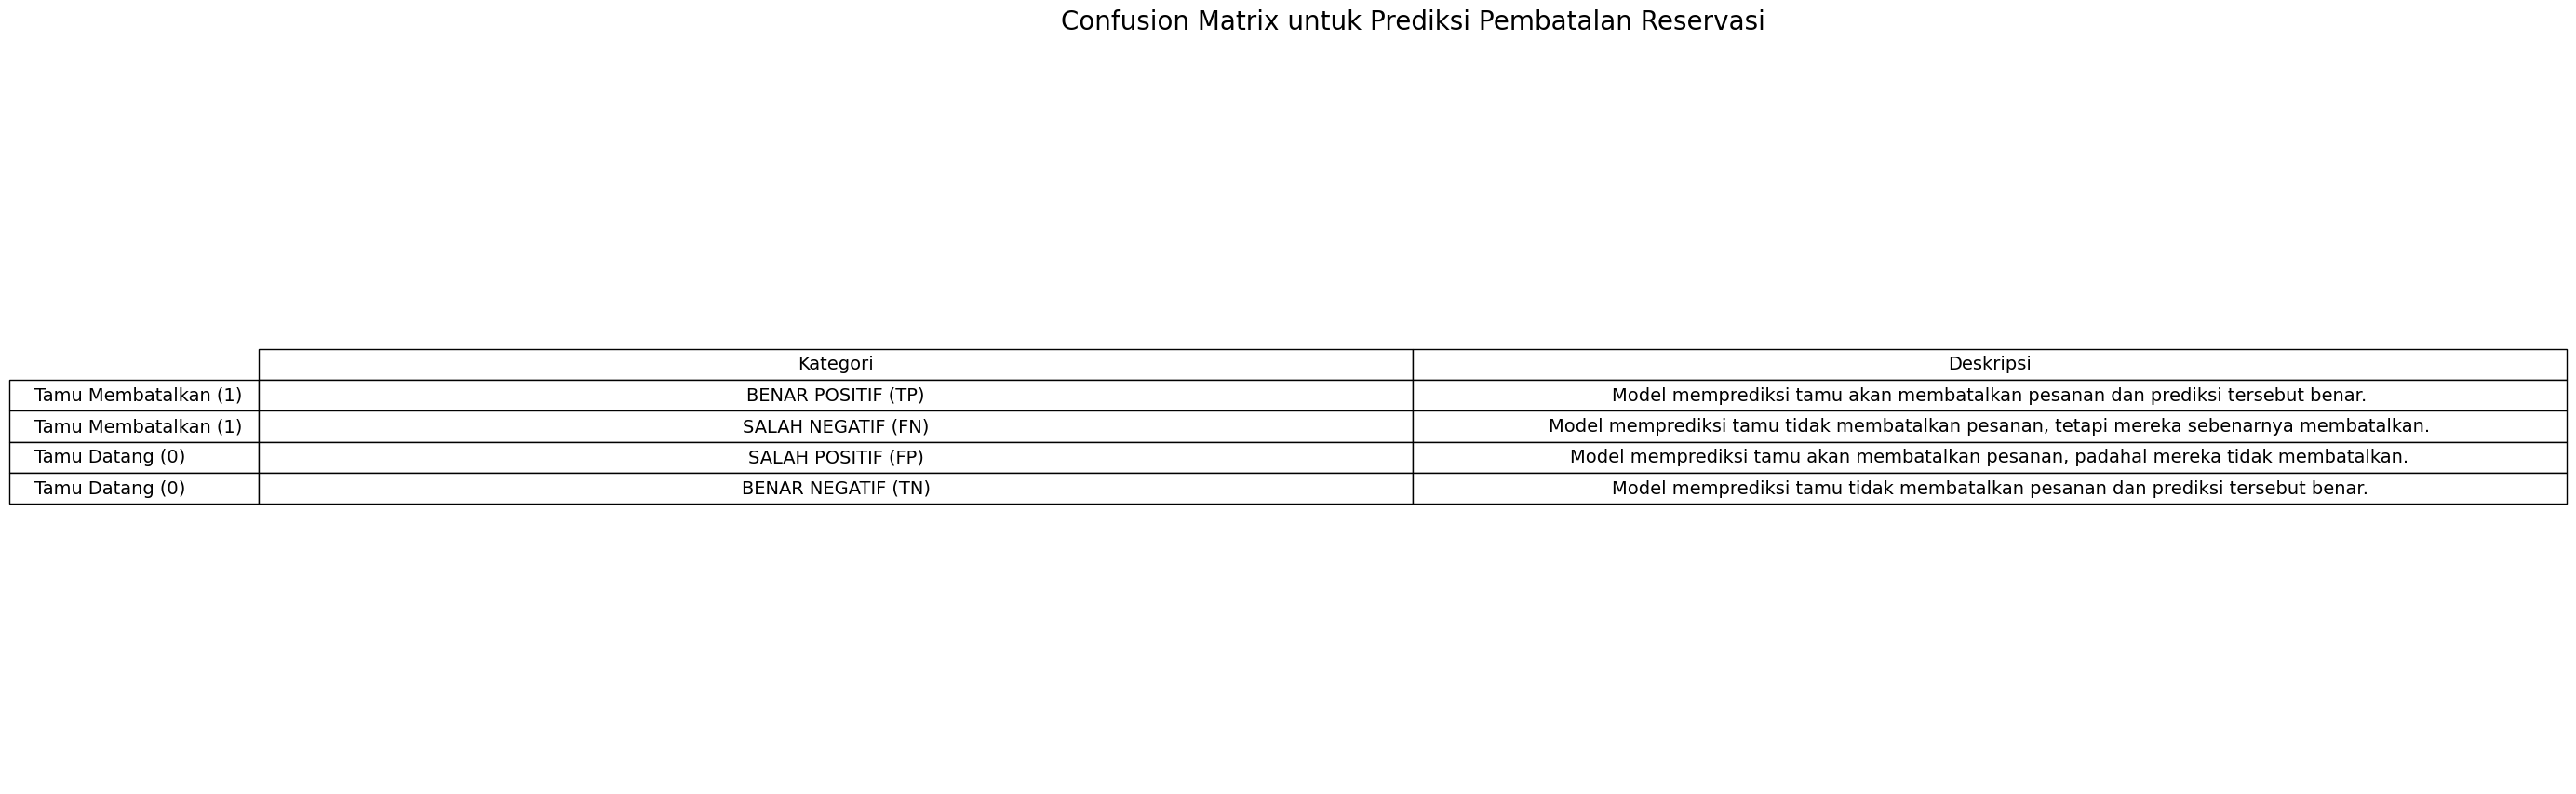

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data untuk tabel dengan teks yang dipisah dalam beberapa baris
data = [
    ["BENAR POSITIF (TP)", "Model memprediksi tamu akan membatalkan pesanan dan prediksi tersebut benar."],
    ["SALAH NEGATIF (FN)", "Model memprediksi tamu tidak membatalkan pesanan, tetapi mereka sebenarnya membatalkan."],
    ["SALAH POSITIF (FP)", "Model memprediksi tamu akan membatalkan pesanan, padahal mereka tidak membatalkan."],
    ["BENAR NEGATIF (TN)", "Model memprediksi tamu tidak membatalkan pesanan dan prediksi tersebut benar."]
]

# Membuat dataframe
df = pd.DataFrame(data, columns=["Kategori", "Deskripsi"], 
                  index=["Tamu Membatalkan (1)", "Tamu Membatalkan (1)", "Tamu Datang (0)", "Tamu Datang (0)"])

# Membuat plot dan tabel
fig, ax = plt.subplots(figsize=(16, 10))  # Ukuran tabel disesuaikan

# Hapus grid
ax.axis('tight')
ax.axis('off')

# Membuat tabel di plot
table = ax.table(cellText=df.values, rowLabels=df.index, colLabels=df.columns, loc='center', cellLoc='center')

# Pengaturan ukuran font agar lebih sesuai
table.auto_set_font_size(False)
table.set_fontsize(14)  # Ukuran font lebih besar
table.scale(2, 2)  # Skalakan tabel agar proporsional

# Judul
ax.set_title('Confusion Matrix untuk Prediksi Pembatalan Reservasi', fontsize=20, pad=30)

# Tampilkan plot
plt.show()


- Salah Negatif (FN)
Model memprediksi bahwa tamu tidak akan membatalkan reservasi, tetapi kenyataannya tamu membatalkan.
Implikasi: Kesalahan ini dapat menyebabkan kerugian finansial, karena kamar dibiarkan kosong tanpa ada tamu lain yang memanfaatkannya.
- Salah Positif (FP)
Model memprediksi bahwa tamu akan membatalkan reservasi, tetapi kenyataannya tamu tidak membatalkan.
Implikasi: Hal ini dapat menyebabkan overbooking (pemesanan berlebih) jika hotel berasumsi bahwa kamar akan kosong, sehingga memesan ulang kamar untuk tamu lain.

## Analisis Metrik

Dari hasil evaluasi metrik, fokus utama kita adalah mengurangi False Negative Rate, karena risiko yang muncul akibat kesalahan ini cukup signifikan. False Negative (FN) terjadi ketika tamu yang seharusnya membatalkan reservasi diprediksi sebagai tamu yang tidak akan membatalkan. Jika ini terjadi, hotel berpotensi kehilangan pendapatan karena kamar yang sudah dipesan tetap dibiarkan kosong. Contohnya, pada saat musim liburan atau akhir pekan, kamar kosong akibat prediksi yang salah tidak hanya berarti hilangnya pendapatan, tetapi juga kesempatan untuk menarik pelanggan baru melalui platform OTA seperti Traveloka atau Agoda.

Namun, kita juga perlu berhati-hati terhadap False Positive (FP), yang dapat menyebabkan risiko overbooking. False Positive terjadi ketika model memprediksi bahwa tamu akan membatalkan reservasi, tetapi tamu tersebut sebenarnya tetap datang. Dalam situasi ini, kamar yang sudah dijual kembali akan menyebabkan masalah logistik jika tidak ada kamar cadangan yang tersedia. Misalnya, seorang tamu datang untuk check-in, tetapi kamar mereka telah diberikan kepada tamu lain karena prediksi pembatalan yang salah. Hal ini dapat menciptakan pengalaman negatif bagi tamu dan berisiko menurunkan reputasi hotel.

Untuk mengatasi kedua risiko ini, model prediksi yang baik harus memiliki nilai recall yang tinggi untuk memastikan bahwa tamu yang benar-benar membatalkan reservasi dapat teridentifikasi dengan baik. Recall yang tinggi memberikan hotel kemampuan untuk mengambil langkah antisipatif, seperti memasarkan kembali kamar yang tersedia melalui promosi atau diskon menit terakhir. Misalnya, kamar yang kosong karena pembatalan bisa segera dipasarkan ke calon tamu baru di OTA dengan harga promosi.

Namun, tidak cukup hanya mengandalkan recall yang tinggi. Kita juga harus mempertimbangkan nilai precision untuk memastikan bahwa model tidak terlalu sering salah memprediksi pembatalan. Jika precision rendah, hotel bisa terlalu sering menjual kembali kamar yang sebenarnya sudah terisi, yang akan berujung pada overbooking. Maka, model harus menjaga keseimbangan antara kedua metrik ini untuk memberikan hasil prediksi yang akurat.

Metrik F1-score menjadi penting dalam situasi ini karena mampu menangkap keseimbangan antara precision dan recall, terutama saat menghadapi ketidakseimbangan data antara tamu yang membatalkan dan yang tidak membatalkan. Namun, dalam konteks operasional hotel, recall lebih ditekankan karena risiko kamar kosong lebih merugikan dibandingkan risiko overbooking. Contohnya, hotel di kawasan wisata strategis yang tidak mampu menjual kamar kosong di musim puncak akan kehilangan pendapatan yang signifikan.

Secara keseluruhan, model prediksi yang ideal adalah model dengan recall tinggi untuk memaksimalkan pemanfaatan kapasitas kamar sekaligus menjaga precision agar risiko operasional, seperti overbooking, dapat diminimalkan. Dengan strategi ini, hotel dapat meningkatkan efisiensi penjualan kamar sekaligus mengurangi potensi kerugian.

In [3]:
import pandas as pd
import numpy as np
from IPython import get_ipython
from IPython.display import display
import missingno as msno
# %%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
# Preprocessing the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
#
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import HistGradientBoostingClassifier
#
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
# contoh hasil resampler pada semua undersampler
rus = RandomUnderSampler(random_state=42)
cnn = CondensedNearestNeighbour()
ncr = NeighbourhoodCleaningRule()
nm1 = NearMiss(version= 1)
nm2 = NearMiss(version= 2)
nm3 = NearMiss(version= 3)

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
# definisikan setiap metode
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
adasyn = ADASYN(random_state = 42)
smt = SMOTETomek(random_state = 42)
sme = SMOTEENN(random_state = 42)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# LOAD DATA

In [4]:
df = pd.read_csv('data_hotel_booking_demand.csv')
display(df.head(),df.tail())

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83572,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


###Deskripsi Fitur

| Kolom | Penjelasan |
|---|---|
| country |  Negara asal tamu hotel |
| market_segment | Segmen pasar pemesanan (misalnya Online TA, Offline TA/TO, Direct) |
| previous_cancellations	 | Jumlah pembatalan sebelumnya yang dilakukan oleh tamu|
| booking_changes	 | Jumlah perubahan/amandemen yang dilakukan pada pemesanan |
| deposit_type | Jenis deposit yang dibayarkan (No Deposit, Non Refund, Refundable) |
| days_in_waiting_list | Jumlah hari pemesanan berada dalam daftar tunggu |
| customer_type | Tipe pelanggan (Transient, Contract, Group, Transient-Party) |
| reserved_room_type | Tipe kamar yang dipesan (A, B, C, D, E, F, G, H) |
| required_car_parking_spaces | Jumlah tempat parkir mobil yang diminta|
| total_of_special_requests | Jumlah permintaan khusus yang dibuat oleh tamu |
| is_canceled | Target variable (1 jika pemesanan dibatalkan, 0 jika tidak) |


# DATA UNDERSTANDING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [6]:
# check info
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[ZWE, DNK]"
1,market_segment,object,0,0.00,8,"[Groups, Corporate]"
2,previous_cancellations,int64,0,0.00,15,"[5, 13]"
3,booking_changes,int64,0,0.00,19,"[17, 9]"
4,deposit_type,object,0,0.00,3,"[No Deposit, Refundable]"
5,days_in_waiting_list,int64,0,0.00,115,"[83, 77]"
6,customer_type,object,0,0.00,4,"[Contract, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[F, C]"
8,required_car_parking_spaces,int64,0,0.00,5,"[2, 8]"
9,total_of_special_requests,int64,0,0.00,6,"[3, 0]"


## Missing Value

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

country                        0.419992
market_segment                 0.000000
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

<Axes: >

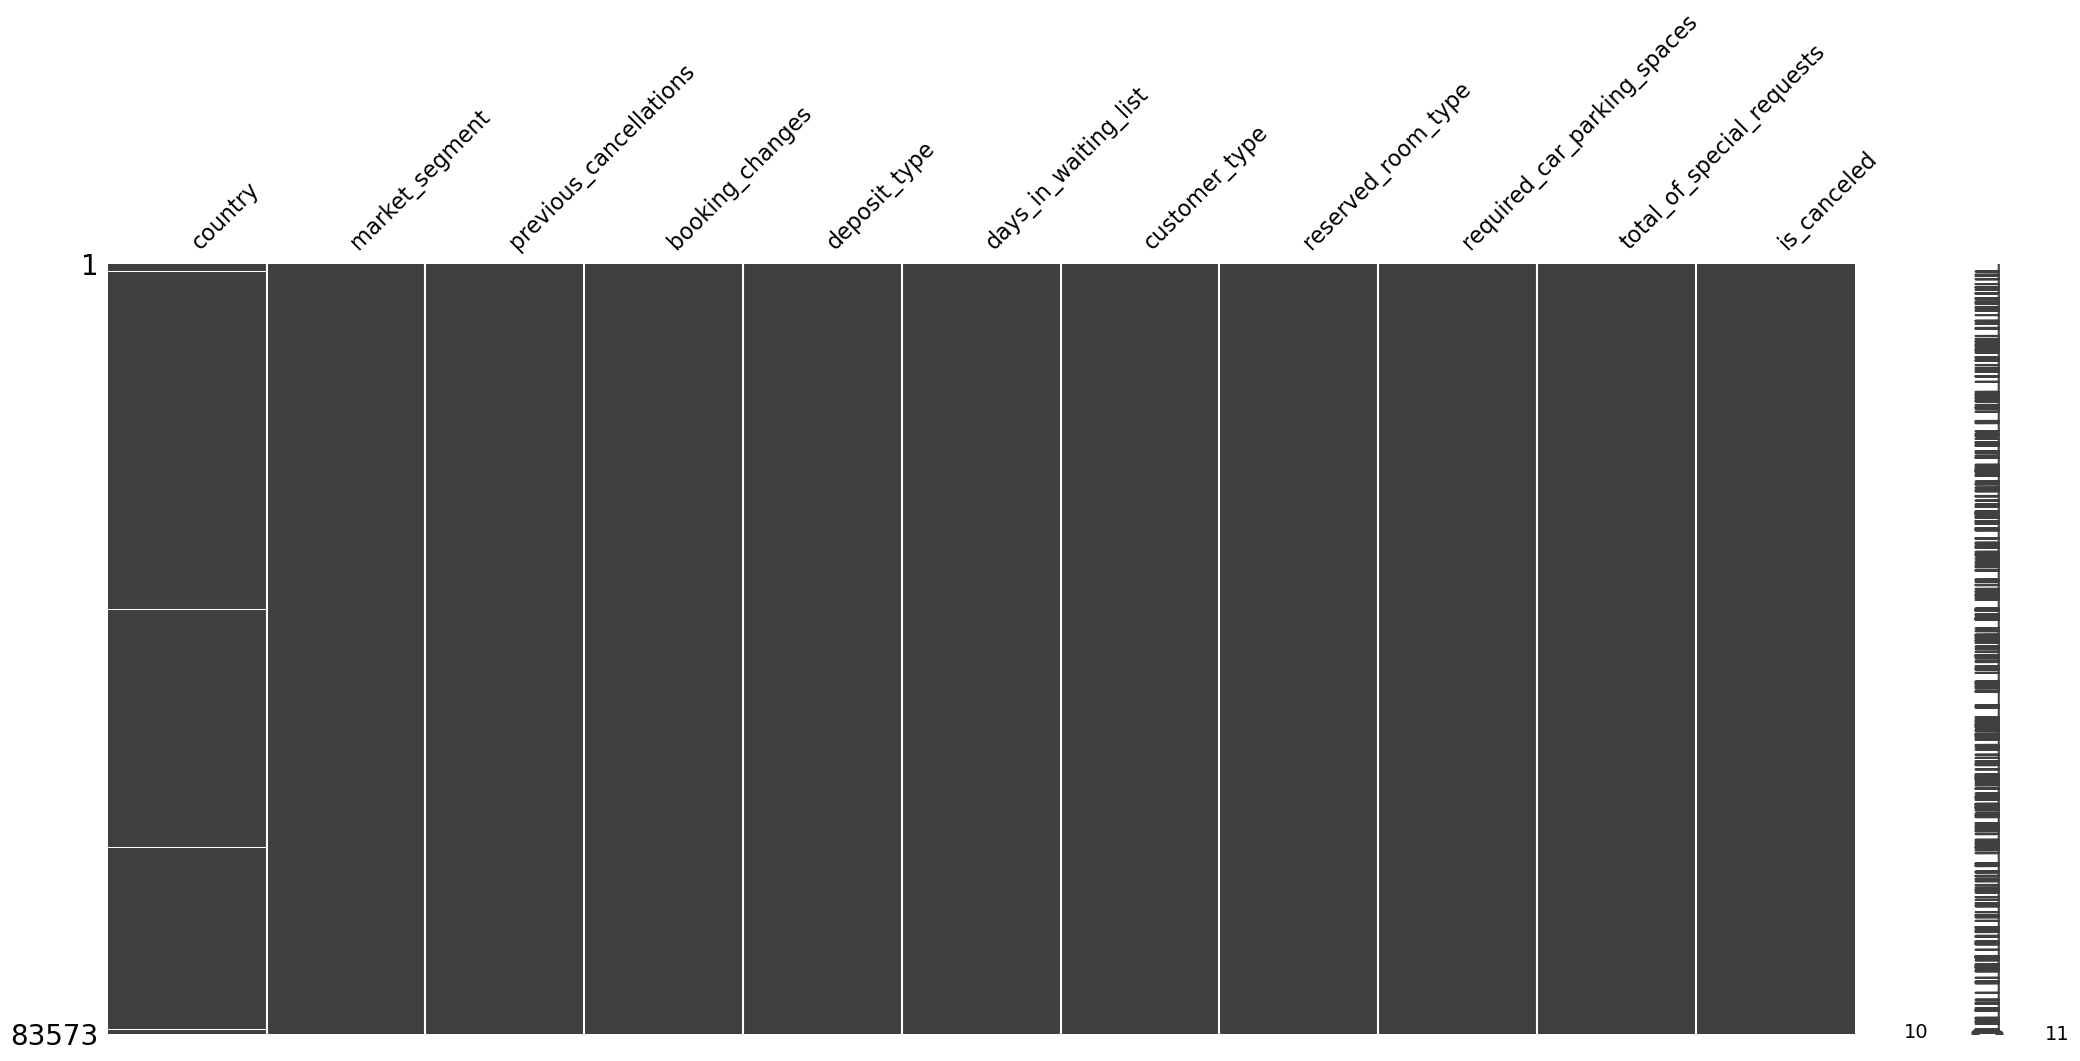

In [8]:
msno.matrix(df)

## Numerical Features

## Statistika Descriptif

In [9]:
# describe numerical
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


## Korelasi

In [10]:

# Mengambil hanya kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']) #hanya kolom yang memiliki tipe data numerik

# Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_columns.corr()
correlation_matrix

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000000,-0.027361,0.006895,-0.018208,-0.048026,0.109598
booking_changes,-0.027361,1.000000,-0.010687,0.068508,0.055748,-0.145746
days_in_waiting_list,0.006895,-0.010687,1.000000,-0.030333,-0.083275,0.056203
required_car_parking_spaces,-0.018208,0.068508,-0.030333,1.000000,0.083678,-0.194807
total_of_special_requests,-0.048026,0.055748,-0.083275,0.083678,1.000000,-0.235993
is_canceled,0.109598,-0.145746,0.056203,-0.194807,-0.235993,1.000000


In [11]:
# Menampilkan matriks korelasi
print(correlation_matrix)

                             previous_cancellations  booking_changes  \
previous_cancellations                     1.000000        -0.027361   
booking_changes                           -0.027361         1.000000   
days_in_waiting_list                       0.006895        -0.010687   
required_car_parking_spaces               -0.018208         0.068508   
total_of_special_requests                 -0.048026         0.055748   
is_canceled                                0.109598        -0.145746   

                             days_in_waiting_list  \
previous_cancellations                   0.006895   
booking_changes                         -0.010687   
days_in_waiting_list                     1.000000   
required_car_parking_spaces             -0.030333   
total_of_special_requests               -0.083275   
is_canceled                              0.056203   

                             required_car_parking_spaces  \
previous_cancellations                         -0.018208   
boo

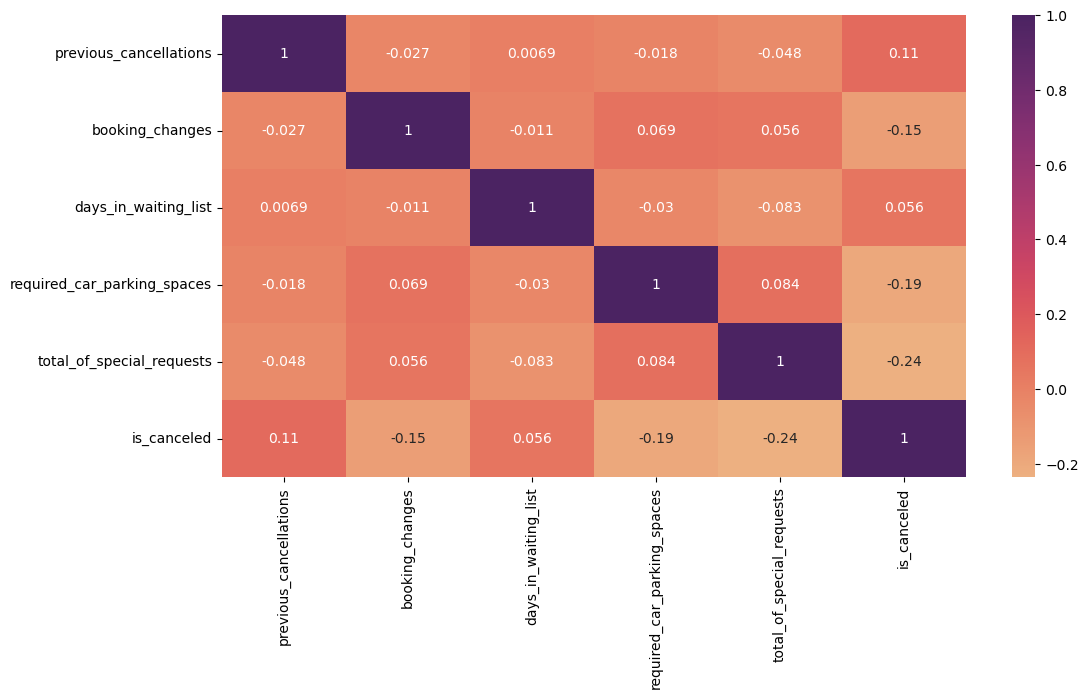

In [12]:
# Assuming df is your DataFrame
numeric_cols = df.select_dtypes(include=['number'])

# Now create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='flare')
plt.show()

Point yang bisa diambil :

Korelasi Signifikan
1. required_car_parking_spaces dan is_canceled:
Korelasi negatif moderat (-0.1948), menunjukkan bahwa pelanggan yang membutuhkan tempat parkir cenderung lebih kecil kemungkinannya untuk membatalkan pemesanan.
2. total_of_special_requests dan is_canceled:
Korelasi negatif cukup signifikan (-0.2360), menunjukkan semakin banyak permintaan khusus, semakin kecil kemungkinan pembatalan.
3. previous_cancellations dan is_canceled:
Korelasi positif lemah (0.1096), menunjukkan pelanggan dengan riwayat pembatalan memiliki kemungkinan sedikit lebih besar untuk membatalkan lagi.


Korelasi Tidak Signifikan
1. booking_changes dan is_canceled:
Korelasi negatif lemah (-0.1457), menunjukkan hubungan yang tidak signifikan antara jumlah perubahan pemesanan dan kemungkinan pembatalan.
2. days_in_waiting_list dan is_canceled:
Korelasi positif sangat lemah (0.0562), menunjukkan bahwa jumlah hari dalam daftar tunggu hampir tidak memengaruhi kemungkinan pembatalan.
3. Hubungan antar variabel lainnya:
Sebagian besar korelasi antar variabel selain is_canceled, seperti previous_cancellations dengan booking_changes (-0.0274) atau days_in_waiting_list dengan required_car_parking_spaces (-0.0303), sangat lemah dan tidak signifikan.

## Data Distribution & Outliers

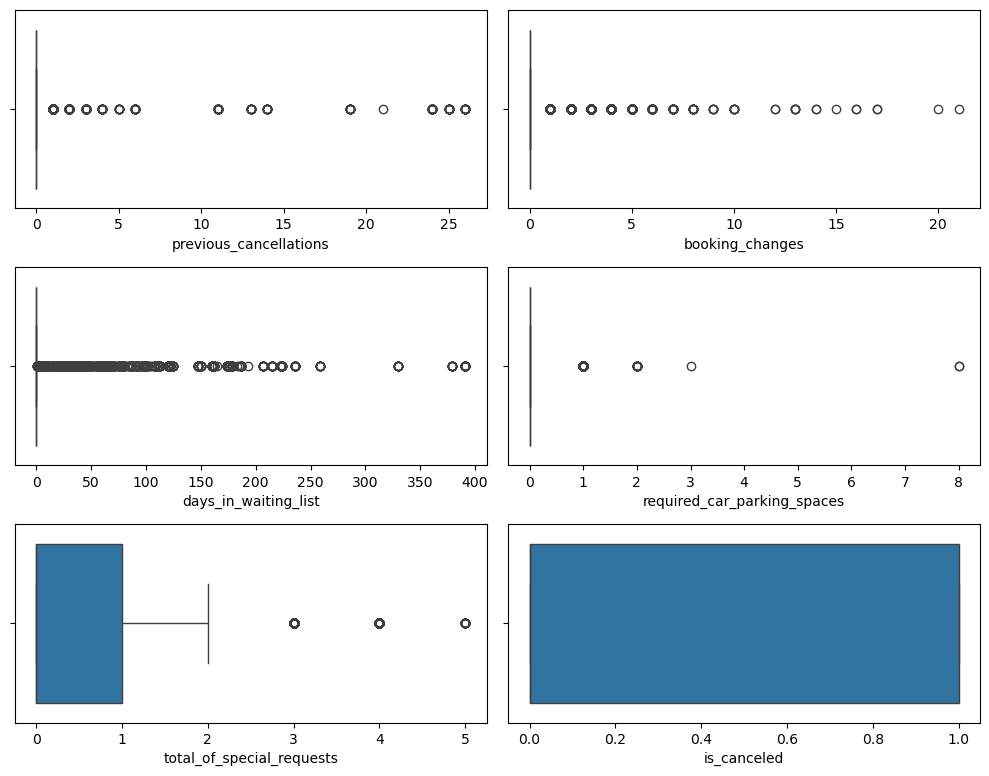

In [14]:
numerik = df.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.boxplot(x = df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

Terlihat ada beberapa outliers namun ini adalah hal yang wajar sehingga tidak perlu dilakukan cleaning kedepannya

In [15]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

numerical_columns = ['days_in_waiting_list', 'previous_cancellations',
                    'booking_changes', 'total_of_special_requests']

for col in numerical_columns:
    print(f"Number of outliers in {col}: {detect_outliers(df, col)}")

Number of outliers in days_in_waiting_list: 2585
Number of outliers in previous_cancellations: 4513
Number of outliers in booking_changes: 12700
Number of outliers in total_of_special_requests: 2051


## Multicollinearity with  VIF

In [16]:

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your DataFrame and you want to check multicollinearity for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
X = df[numerical_features]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF values
vif_data

,feature,VIF
0,previous_cancellations,1.022907
1,booking_changes,1.069874
2,days_in_waiting_list,1.016484
3,required_car_parking_spaces,1.059251
4,total_of_special_requests,1.137178
5,is_canceled,1.086679


Variance Inflation Factor (VIF) mengukur tingkat multikolinearitas antar variabel dalam dataset. Nilai VIF yang lebih kecil dari 5 umumnya menunjukkan tidak adanya masalah multikolinearitas yang signifikan. 
dapat disimpulkan :
- semua fitur dalam dataset memiliki nilai VIF di bawah 5, yang berarti tidak ada indikasi multikolinearitas signifikan.
- Variabel-variabel ini dapat digunakan bersama dalam model regresi tanpa risiko distorsi dari hubungan linear antar fitur.
- Model dapat diharapkan memberikan hasil yang stabil dan andal.


## Categorical Features

In [17]:
# describe categorical
df.describe(exclude='number')

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


## Unique Value

In [18]:
kategorik = df.select_dtypes(include = 'object')
kategorik.nunique()


country               162
market_segment          8
deposit_type            3
customer_type           4
reserved_room_type     10
dtype: int64

## Value Counts

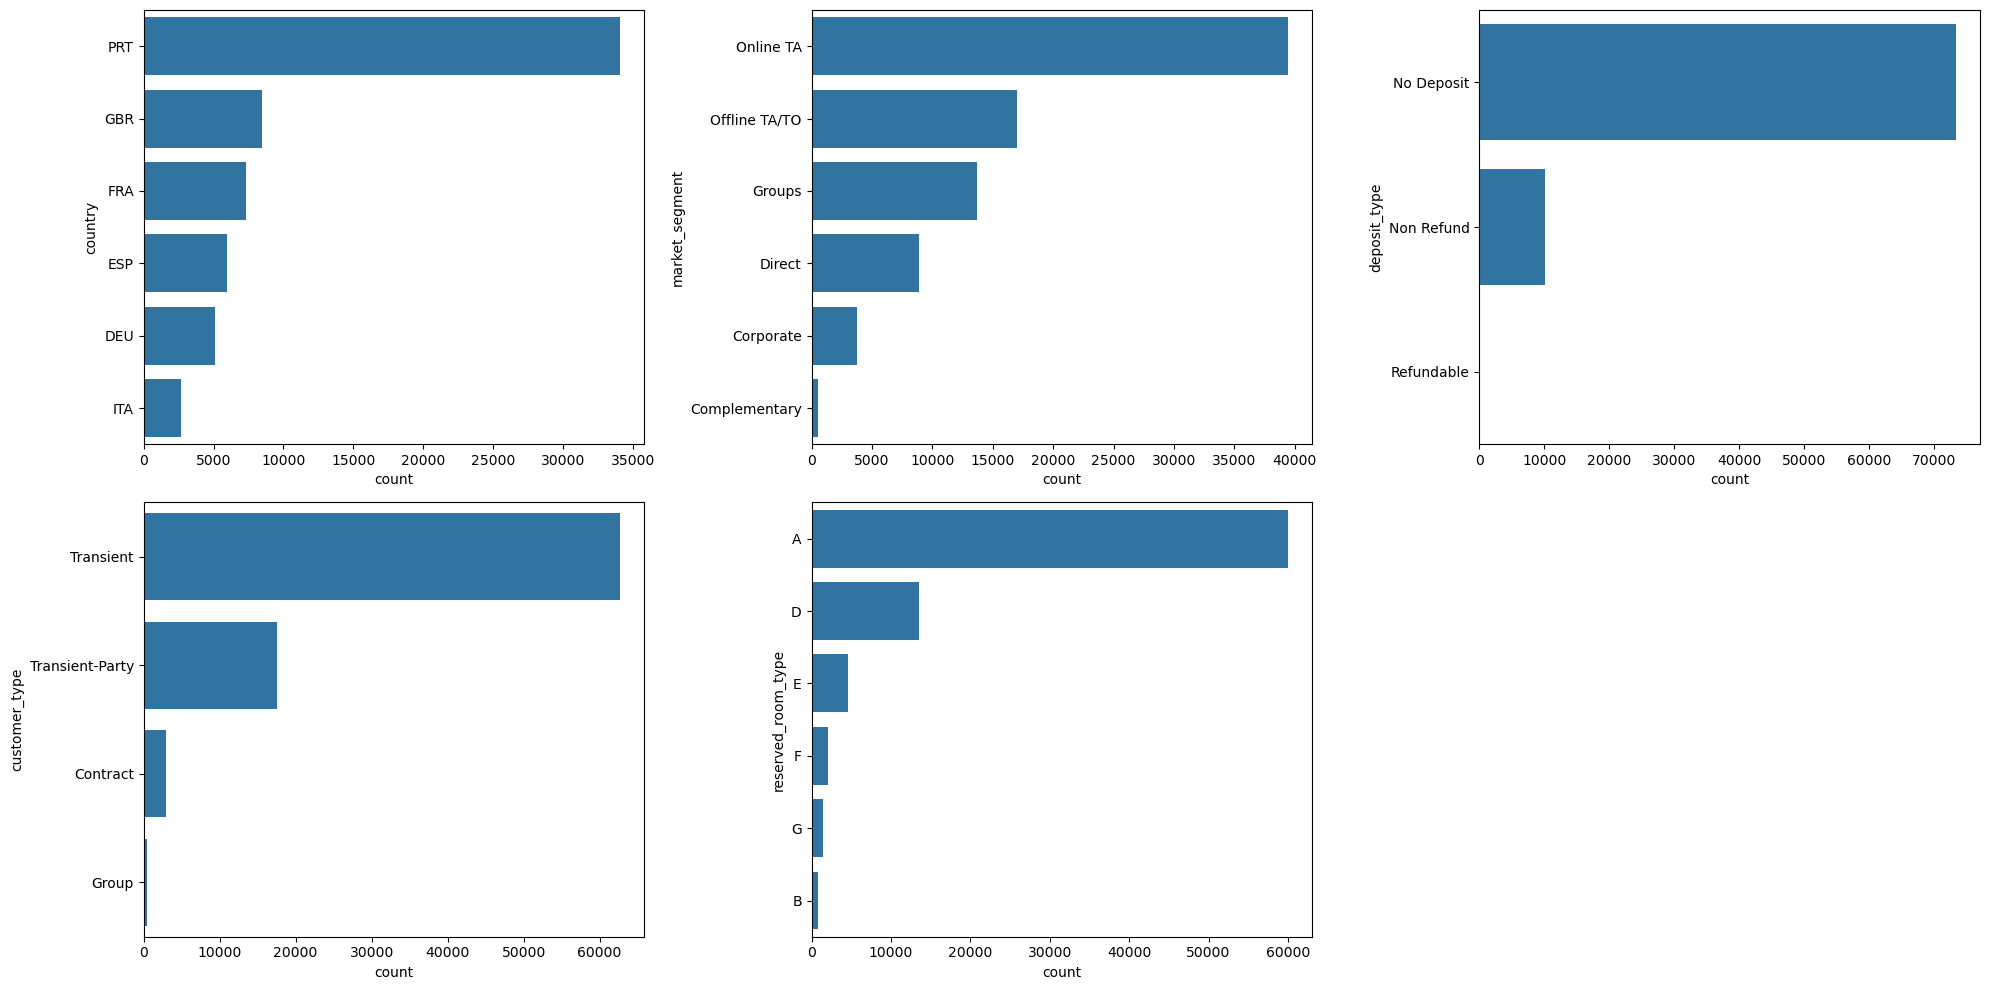

In [19]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (20,10)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in kategorik.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(2,3,posisi)
    sns.barplot(df[setiap_kolom].value_counts().head(6), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [20]:
# Misalkan 'df' adalah DataFrame Anda, dan 'kategorik' adalah DataFrame yang hanya berisi kolom kategorikal

for setiap_kolom in kategorik.columns:
    value_counts = df[setiap_kolom].value_counts()  # Mendapatkan frekuensi kemunculan nilai unik
    print(f"Kolom: {setiap_kolom}")
    print(value_counts)  # Menampilkan nilai unik beserta frekuensinya
    print("-" * 40)


Kolom: country
country
PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
ZMB        1
LCA        1
SYC        1
GLP        1
AIA        1
Name: count, Length: 162, dtype: int64
----------------------------------------
Kolom: market_segment
market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64
----------------------------------------
Kolom: deposit_type
deposit_type
No Deposit    73352
Non Refund    10111
Refundable      110
Name: count, dtype: int64
----------------------------------------
Kolom: customer_type
customer_type
Transient          62732
Transient-Party    17536
Contract            2882
Group                423
Name: count, dtype: int64
----------------------------------------
Kolom: reserved_room_type
reserved_room_type
A    60041
D    13526
E     4649
F     2037
G     1447
B   

Ditemukan pada kolom market_segment terdapat valueunique Undefined berjumlah 1
- Nilai Undefined bisa membuat model kesulitan dalam memahami pola atau struktur data, karena sering kali menunjukkan data yang hilang atau tidak valid. Model mungkin tidak tahu bagaimana menangani kategori ini, yang dapat menurunkan akurasi atau bahkan memunculkan nilai nan pada case tertentu

# Data Cleaning

## Missing Value

### Country

In [21]:
print(df['country'].isnull().sum())

351


In [22]:
df['country'].value_counts()


country
PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
ZMB        1
LCA        1
SYC        1
GLP        1
AIA        1
Name: count, Length: 162, dtype: int64

In [23]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [24]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [25]:
df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

### Duplicate

In [26]:
df.duplicated().sum()

73476

In [27]:
duplict = df[df.duplicated()].head(10)
duplict

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
45,PRT,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,1
47,PRT,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,1
52,PRT,Groups,1,0,Non Refund,0,Contract,A,0,0,1
54,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
62,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0


In [28]:
# Create a function to analyze patterns in duplicates
def analyze_duplicate_patterns(row):
    return pd.Series({
        'booking_changes': row['booking_changes'].max(),
        'previous_cancellations': row['previous_cancellations'].max(),
        'total_special_requests': row['total_of_special_requests'].max(),
        'count': len(row)
    })

# Group by all columns and analyze patterns
duplicate_patterns = df.groupby(df.columns.tolist()).size().reset_index(name='count')
print("Top duplicate patterns by frequency:")
print(duplicate_patterns.sort_values('count', ascending=False).head())

# Analyze if duplicates might be legitimate group bookings
business_keys = ['country', 'market_segment', 'customer_type', 'reserved_room_type', 'deposit_type']
group_analysis = df.groupby(business_keys).apply(analyze_duplicate_patterns).reset_index()

print("\
Analysis of potential group bookings:")
print(group_analysis.sort_values('count', ascending=False).head())

Top duplicate patterns by frequency:
     country market_segment  previous_cancellations  booking_changes  \
7937     PRT         Groups                       0                0   
8243     PRT  Offline TA/TO                       0                0   
7881     PRT         Groups                       0                0   
8531     PRT      Online TA                       0                0   
7176     PRT      Corporate                       0                0   

     deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
7937   Non Refund                     0        Transient                  A   
8243   Non Refund                     0        Transient                  A   
7881   No Deposit                     0  Transient-Party                  A   
8531   No Deposit                     0        Transient                  A   
7176   No Deposit                     0        Transient                  A   

      required_car_parking_spaces  total_of_special_req

In [29]:
group_stats = df.groupby(['country', 'market_segment', 'customer_type']).agg({
    'previous_cancellations': ['mean', 'max'],
    'booking_changes': ['mean', 'max'],
    'total_of_special_requests': ['mean', 'max'],
    'is_canceled': 'mean',
    'reserved_room_type': 'count'
}).round(2)

pd.set_option('display.max_columns', None)
group_stats

previous_cancellations      \
                                                         mean max   
country market_segment customer_type                                
ABW     Online TA      Transient                          0.0   0   
AGO     Complementary  Transient                          0.0   0   
        Corporate      Transient                          0.0   0   
                       Transient-Party                    0.0   0   
        Direct         Group                              0.0   0   
...                                                       ...  ..   
ZAF     Online TA      Transient                          0.0   0   
                       Transient-Party                    0.0   0   
ZMB     Online TA      Transient                          0.0   0   
ZWE     Direct         Transient                          0.0   0   
        Offline TA/TO  Transient                          0.0   0   

                                       booking_changes      \
                                                  mean max   
country market_segment customer_type                         
ABW     Online TA      Transient                  0.00   0   
AGO     Complementary  Transient                  0.00   0   
        Corporate      Transient                  1.00   3   
                       Transient-Party            0.00   0   
        Direct         Group                      0.00   0   
...                                                ...  ..   
ZAF     Online TA      Transient                  0.26   4   
                       Transient-Party            0.00   0   
ZMB     Online TA      Transient                  0.00   0   
ZWE     Direct         Transient                  2.00   4   
        Offline TA/TO  Transient                  0.00   0   

                                       total_of_special_requests      \
                                                            mean max   
country market_segment customer_type                                   
ABW     Online TA      Transient                            1.50   2   
AGO     Complementary  Transient                            0.67   1   
        Corporate      Transient                            0.75   2   
                       Transient-Party                      0.00   0   
        Direct         Group                                1.00   1   
...                                                          ...  ..   
ZAF     Online TA      Transient                            0.81   3   
                       Transient-Party                      2.00   2   
ZMB     Online TA      Transient                            1.00   1   
ZWE     Direct         Transient                            0.00   0   
        Offline TA/TO  Transient                            0.00   0   

                                       is_canceled reserved_room_type  
                                              mean              count  
country market_segment customer_type                                   
ABW     Online TA      Transient              0.00                  2  
AGO     Complementary  Transient              0.00                  3  
        Corporate      Transient              0.00                  4  
                       Transient-Party        0.00                  1  
        Direct         Group                  0.00                  1  
...                                            ...                ...  
ZAF     Online TA      Transient              0.45                 42  
                       Transient-Party        0.00                  2  
ZMB     Online TA      Transient              1.00                  1  
ZWE     Direct         Transient              1.00                  2  
        Offline TA/TO  Transient              0.00                  1  

[855 rows x 8 columns]

- Grup booking memiliki pola yang konsisten (terutama untuk Groups dan TA/TO)
- Ada variasi dalam booking_changes dan special_requests yang menunjukkan ini adalah booking terpisah
- Tingkat pembatalan (is_canceled) bervariasi dalam grup yang sama
- Menghapus duplikat akan menghilangkan informasi tentang volume booking yang sebenarnya

Data duplikat harus dipertahankan karena mengandung informasi yang menggambarkan volume sebenarnya dari booking yang dilakukan, serta mencerminkan pola-pola yang signifikan dalam perilaku pelanggan, seperti pemesanan grup atau perubahan pesanan, yang sangat berharga untuk peramalan permintaan, pengelolaan kapasitas, dan pengambilan keputusan strategis dalam manajemen hotel.

## Undefined pada kolom smarket_segment

In [30]:
df['market_segment'].value_counts()

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64

In [31]:
# menghapus data undefined
df = df[df['market_segment']!='Undefined']
df['market_segment'].value_counts()


market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Name: count, dtype: int64

# Data Preparation

In [32]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


## ENCODING

1. One Hot Encoding untuk kolom : digunakan karena memiliki fitur yang sedikit dan juga digunakan untuk mengonversi kolom kategorikal yang memiliki beberapa kategori menjadi beberapa fitur biner (0 atau 1). Setiap kategori akan diwakili oleh satu kolom biner yang menunjukkan apakah kategori tersebut ada pada entri data. 
  - market_segmen
    - terdapat 8 kategori sehingga 8 fitur
  - deposit_type
    - terdapat 3 kategori sehingga 3 fitur
  - customer_type
    - terdapat 3 kategori sehingga 4 fitur
2. Binary encoding
 - Country
    - Merubah fitur/kolom country menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
3. Ordinal encoding
  - reserved_room_type
      - Dalam konteks ini, OrdinalEncoder digunakan untuk mengonversi kolom kategorikal 'reserved_room_type' yang memiliki urutan tertentu (A, B, C, dll.) menjadi nilai numerik sesuai dengan urutan yang ditentukan dalam room_type_mapping. Mapping tersebut memberikan nilai numerik berdasarkan urutan, misalnya 'A' menjadi 1, 'B' menjadi 2, dan seterusnya, mencerminkan tingkat atau kategori yang memiliki hubungan ordinal.
4. Fitur Numerikal memakai robust scaler : RobustScaler tahan terhadap outlier karena menggunakan median dan IQR untuk skala data, sehingga lebih stabil pada data dengan distribusi tidak normal atau nilai ekstrim. Ideal untuk dataset yang mengandung outlier.
 - previous_cancellations
 - booking_changes
 - days_in_waiting_list
 - required_car_parking_spaces
 - total_of_special_requests


## Split Data

In [33]:
X = df.drop(columns=['is_canceled'], axis=1)
y = df['is_canceled']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify = y)
#Mengatasi Dataset Tidak Seimbang:
#Ketika data target memiliki distribusi tidak seimbang (misalnya, 90% kelas A dan 10% kelas B), stratifikasi memastikan bahwa proporsi ini dipertahankan dalam data latih dan data uji.

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66857, 10), (16715, 10), (66857,), (16715,))

## TRANSFORM

In [36]:
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [37]:
numeric_features = X.select_dtypes(include=['number']).columns.tolist()

In [38]:
room_type_mapping = [{'col':'reserved_room_type', 'mapping' :{
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'L': 9,
    'P': 10
}}]

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
       ('num', RobustScaler() , numeric_features),
       ('cat', OneHotEncoder(drop= 'first'), ['market_segment', 'customer_type', 'deposit_type']),
      ('ordinal', ce.OrdinalEncoder(mapping= room_type_mapping), ['reserved_room_type']),
      ('cat_county', BinaryEncoder(), ['country']),
    ],remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['market_segment', 'customer_type',
                                  'deposit_type']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                          'data_type': dtype('O'),
                                                          'mapping': A     1
B     2
C     3
D     4
E     5
F     6
G     7
H     8
L     9
P    10
dtype: int64}]),
                                 ['reserved_room_type']),
                                ('cat_county', BinaryEncoder(), ['country'])])

# MODELLING AND EVALUATION

Menggunakan berbagai algoritma dalam pembangunan model machine learning memungkinkan perbandingan kinerja untuk menemukan yang paling efektif, berdasarkan metrik seperti akurasi, precision, dan recall. Menguji beberapa model mengurangi risiko ketergantungan pada satu model dan membantu menghindari overfitting atau underfitting, sehingga model lebih mudah menggeneralisasi pada data baru.

Pendekatan ensemble seperti Random Forest dan Gradient Boosting menggabungkan kekuatan beberapa model untuk meningkatkan akurasi. Setiap model memiliki kekuatan tertentu, misalnya XGBoost unggul untuk data besar, sementara Logistic Regression cocok untuk masalah klasifikasi sederhana.

Dengan mendiversifikasi model, kita dapat memilih yang paling sesuai dengan karakteristik data dan mengoptimalkan kinerja untuk solusi terbaik.

In [43]:
lr = LogisticRegression(random_state=42, max_iter = 1000)
dt = DecisionTreeClassifier(random_state=42, max_depth = 6)
knn = KNeighborsClassifier(n_neighbors=3)
vh = VotingClassifier([
    ('lr',lr),
    ('dt',dt),
    ('knn',knn)
], voting = 'hard')
vs = VotingClassifier([
    ('lr',lr),
    ('dt',dt),
    ('knn',knn)
], voting = 'soft')
stacking = StackingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
], LogisticRegression(random_state=42))
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose = 0)
hgb = HistGradientBoostingClassifier(random_state=42)


In [44]:
# Initialize models
models = {
    'Decision Tree': dt,
     'KNN': knn,
    'Logistic Regression': lr,
     'Voting Classifier (Hard)': vh,
     'Voting Classifier (Soft)': vs,
     'Random Forest': rf,
     'Gradient Boosting': gb,
     'XGBoost': xgb,
     'CatBoost': cat,
}


### Rule Based Model (Non ML)

In [45]:
# Fungsi rule-based
def rule_based(row):
    if row['previous_cancellations'] > 5 and row['booking_changes'] > 3:
        return 1  # Prediksi pembatalan
    elif row['deposit_type'] == 'Non Refund' and row['days_in_waiting_list'] > 30:
        return 1  # Prediksi pembatalan jika deposit non-refundable dan lama di waiting list
    elif row['customer_type'] == 'Contract' and row['required_car_parking_spaces'] > 5:
        return 0  # Prediksi tidak dibatalkan jika tipe pelanggan adalah kontrak dan butuh lebih banyak tempat parkir
    else:
        return 0  # Prediksi tidak dibatalkan

# Menghitung prediksi untuk data latih
y_pred_train_rule_based = X_train.apply(rule_based, axis=1)

# Menghitung F1 score untuk data latih
score_train_rule_based = f1_score(y_train, y_pred_train_rule_based)

# Menghitung prediksi untuk data uji
y_pred_test_rule_based = X_test.apply(rule_based, axis=1)

# Menghitung F1 score untuk data uji
score_test_rule_based = f1_score(y_test, y_pred_test_rule_based)

# Menyusun DataFrame untuk menampilkan hasil
df0 = pd.DataFrame({
    'model': ['Rule Based'],
    'train_score_mean': [score_train_rule_based],
    'train_score_std': [None],  # Tidak ada perhitungan standar deviasi pada rule-based
    'test_score': [score_test_rule_based]
})

# Menampilkan hasil
print(df0)


        model  train_score_mean train_score_std  test_score
0  Rule Based          0.070076            None    0.072938


## Model Benchmarking

In [46]:
# import f1 score
from sklearn.metrics import f1_score

results = [ ]
for model_name, model in models.items():
        print(f'model: {model_name} processing...')
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('model', model)])

        # training model
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # f1 score
        f1 = f1_score(y_test, y_pred)
        print(f'f1 score: {f1}')

# pd.DataFrame(results)

model: Decision Tree processing...
f1 score: 0.693714604029338
model: KNN processing...
f1 score: 0.6956006768189509
model: Logistic Regression processing...
f1 score: 0.6556644985923696
model: Voting Classifier (Hard) processing...
f1 score: 0.6936727678156648
model: Voting Classifier (Soft) processing...
f1 score: 0.6904650070455612
model: Random Forest processing...
f1 score: 0.7245050593928729
model: Gradient Boosting processing...
f1 score: 0.6936736958934517
model: XGBoost processing...
f1 score: 0.7243869817209095
model: CatBoost processing...
f1 score: 0.7252003561887801


In [47]:
results = [ ]
for model_name, model in models.items():
        print(f'model: {model_name} processing...')
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
        recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Mean F1 Score': np.mean(f1_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F1 Score': np.std(f1_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })
        

pd.DataFrame(results)

model: Decision Tree processing...
model: KNN processing...
model: Logistic Regression processing...
model: Voting Classifier (Hard) processing...
model: Voting Classifier (Soft) processing...
model: Random Forest processing...
model: Gradient Boosting processing...
model: XGBoost processing...
model: CatBoost processing...


,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,Decision Tree,0.692000,0.611876,0.796685,0.001325,0.007624,0.014367
1,KNN,0.688436,0.662321,0.717596,0.008048,0.023045,0.011919
2,Logistic Regression,0.649182,0.553633,0.784664,0.003819,0.004931,0.006250
3,Voting Classifier (Hard),0.685529,0.595630,0.807679,0.002724,0.008465,0.009007
4,Voting Classifier (Soft),0.686074,0.593558,0.813287,0.006181,0.013422,0.009817
5,Random Forest,0.717477,0.666504,0.776911,0.004672,0.005926,0.003786
6,Gradient Boosting,0.688766,0.599082,0.810524,0.005323,0.012589,0.009839
7,XGBoost,0.723119,0.669510,0.786608,0.007175,0.017314,0.009534
8,CatBoost,0.724565,0.673328,0.784745,0.006669,0.016559,0.008997


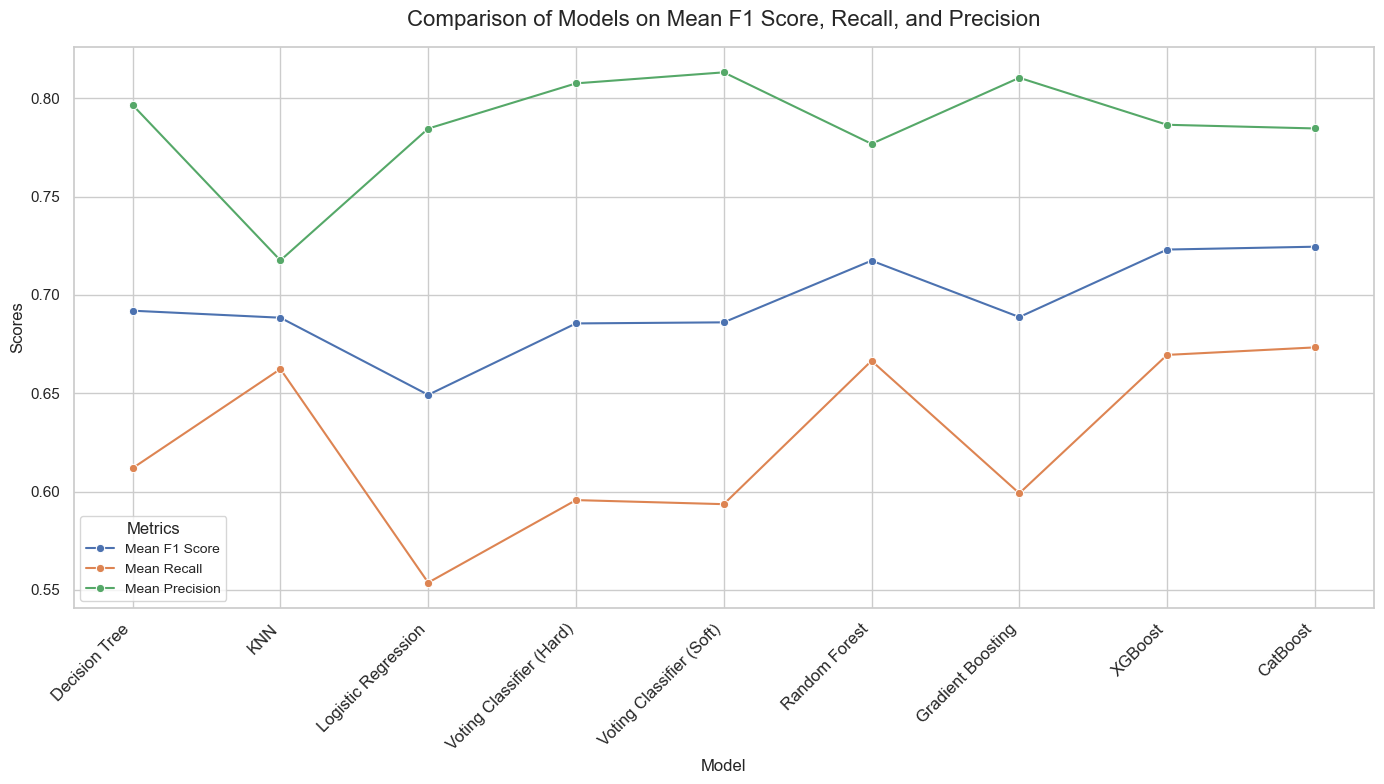

In [48]:

# Dataframe creation
data = {
    "Model": [
        "Decision Tree", "KNN", "Logistic Regression", 
        "Voting Classifier (Hard)", "Voting Classifier (Soft)", 
        "Random Forest", "Gradient Boosting", "XGBoost", "CatBoost"
    ],
    "Mean F1 Score": [0.692000, 0.688436, 0.649182, 0.685529, 0.686074, 0.717477, 0.688766, 0.723119, 0.724565],
    "Mean Recall": [0.611876, 0.662321, 0.553633, 0.595630, 0.593558, 0.666504, 0.599082, 0.669510, 0.673328],
    "Mean Precision": [0.796685, 0.717596, 0.784664, 0.807679, 0.813287, 0.776911, 0.810524, 0.786608, 0.784745],
    "Std F1 Score": [0.001325, 0.008048, 0.003819, 0.002724, 0.006181, 0.004672, 0.005323, 0.007175, 0.006669],
    "Std Recall": [0.007624, 0.023045, 0.004931, 0.008465, 0.013422, 0.005926, 0.012589, 0.017314, 0.016559],
    "Std Precision": [0.014367, 0.011919, 0.006250, 0.009007, 0.009817, 0.003786, 0.009839, 0.009534, 0.008997]
}
df = pd.DataFrame(data)

# Plot configuration
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Plot Mean F1, Recall, and Precision
metrics = ["Mean F1 Score", "Mean Recall", "Mean Precision"]
for metric in metrics:
    sns.lineplot(data=df, x="Model", y=metric, marker="o", label=metric)

# Plot aesthetics
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.title("Comparison of Models on Mean F1 Score, Recall, and Precision", fontsize=16, pad=15)
plt.ylabel("Scores", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


Berdasarkan Recall, tiga model terbaik untuk memprediksi apakah pemesanan akan dibatalkan atau tidak (variabel target is_canceled) adalah:
CatBoost (Recall: 0.6767)
XGBoost (Recall: 0.6722)
Random Forest (Recall: 0.6665)

Saya memilih hanya tiga model terbaik berdasarkan Recall untuk fokus pada model yang paling efektif dalam mendeteksi pemesanan yang dibatalkan. Recall membantu meminimalkan false negatives, yang penting untuk memastikan semua pemesanan yang dibatalkan dapat terdeteksi. Dengan memilih tiga model terbaik, kami dapat mengurangi kompleksitas, lebih fokus pada pengoptimalan model, dan meningkatkan kinerja secara efisien melalui teknik seperti hyperparameter tuning dan resampling.

Alasan Pemilihan Model Berdasarkan Recall:
CatBoost memiliki Recall yang tertinggi (0.6767), yang menunjukkan bahwa model ini paling efektif dalam mendeteksi pemesanan yang dibatalkan. CatBoost juga dikenal dapat menangani data dengan banyak fitur dan hubungan non-linear yang kompleks.
XGBoost juga memberikan Recall yang sangat baik (0.6722), yang menunjukkan kemampuannya dalam mengidentifikasi pemesanan yang dibatalkan dengan presisi tinggi.
Random Forest memberikan Recall yang kuat (0.6665), mengindikasikan model ini mampu mendeteksi banyak kasus pemesanan yang dibatalkan meskipun akurasi dan precision-nya sedikit lebih rendah.

Adapun penjelasan model lain: 

Decision Tree: Cenderung mengalami overfitting, karena Precision tinggi tapi Recall rendah. Ini menunjukkan model terlalu cocok dengan data pelatihan dan kesulitan menggeneralisasi.
KNN: Terindikasi underfitting karena Recall bagus, namun Precision rendah, menunjukkan banyak false positives dan kurangnya kompleksitas untuk menangani data.
Logistic Regression: Juga underfitting dengan Recall rendah, kesulitan mendeteksi pemesanan yang dibatalkan.
Voting Classifier (Hard & Soft): Mungkin mengalami overfitting/underfitting, karena ada sedikit ketidakseimbangan antara Recall dan Precision, yang menunjukkan masalah pada kombinasi model dasar.


## Eksperimen mencari model terbaik (Catboost,Xgboost dan Random Forest) dengan resampling methods

In [49]:
# Define the models
models = {
    'CatBoost': cat,
    'XGBoost': xgb,
    'Random Forest': rf
}

# Define the resampling methods
resampling_methods = {
    'Random Under Sampler': RandomUnderSampler(random_state=42),
    # 'Condensed Nearest Neighbour': CondensedNearestNeighbour(),
    'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
   # 'NearMiss 1': NearMiss(version=1),
    #'NearMiss 2': NearMiss(version=2),
    #'NearMiss 3': NearMiss(version=3),
    'Random Over Sampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    #'SMOTE Tomek': SMOTETomek(random_state=42),
   # 'SMOTE ENN': SMOTEENN(random_state=42)
}
# Prepare a DataFrame to store results
results = []

# Loop through each model and resampling method
for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    # Loop through each resampling method
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('resampling', resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
        recall_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Resampling Method': resampling_name,
            'Mean F1 Score': np.mean(f1_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F1 Score': np.std(f1_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

Model: CatBoost processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
Model: XGBoost processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
Model: Random Forest processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...


,Model,Resampling Method,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,CatBoost,Random Under Sampler,0.744093,0.804335,0.692254,0.001803,0.004013,0.000731
1,CatBoost,Neighbourhood Cleaning Rule,0.719415,0.768626,0.676340,0.008159,0.009327,0.014169
2,CatBoost,Random Over Sampler,0.744306,0.802450,0.694066,0.001648,0.004715,0.004835
3,CatBoost,SMOTE,0.744952,0.792378,0.702905,0.002272,0.005487,0.001731
4,CatBoost,ADASYN,0.740045,0.834422,0.664947,0.004732,0.004256,0.009489
5,XGBoost,Random Under Sampler,0.741916,0.786854,0.702018,0.002551,0.012027,0.006013
6,XGBoost,Neighbourhood Cleaning Rule,0.719465,0.768854,0.676225,0.006903,0.007149,0.013217
7,XGBoost,Random Over Sampler,0.743185,0.791663,0.700309,0.001216,0.003042,0.001260
8,XGBoost,SMOTE,0.743443,0.785847,0.705458,0.002497,0.008014,0.004407
9,XGBoost,ADASYN,0.737490,0.836891,0.659314,0.004173,0.006325,0.009181


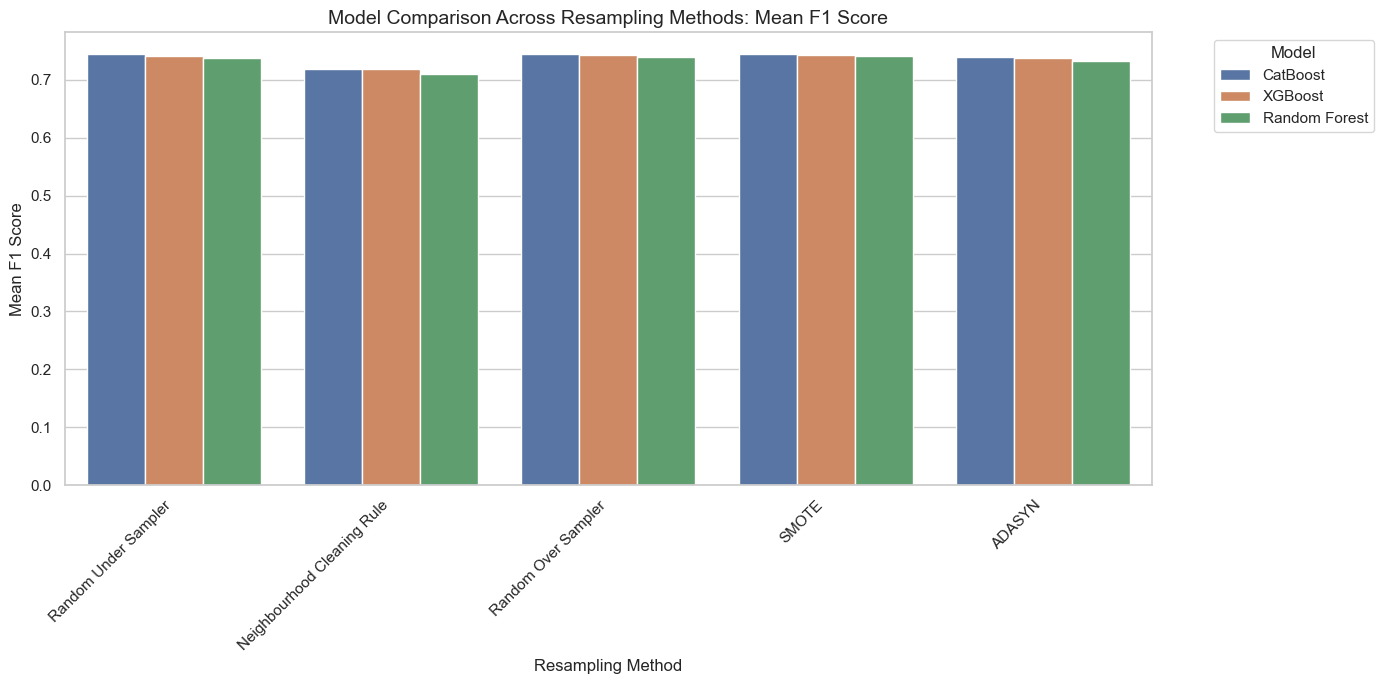

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe creation
data_resampling = {
    "Model": [
        "CatBoost", "CatBoost", "CatBoost", "CatBoost", "CatBoost",
        "XGBoost", "XGBoost", "XGBoost", "XGBoost", "XGBoost",
        "Random Forest", "Random Forest", "Random Forest", "Random Forest", "Random Forest"
    ],
    "Resampling Method": [
        "Random Under Sampler", "Neighbourhood Cleaning Rule", "Random Over Sampler", "SMOTE", "ADASYN",
        "Random Under Sampler", "Neighbourhood Cleaning Rule", "Random Over Sampler", "SMOTE", "ADASYN",
        "Random Under Sampler", "Neighbourhood Cleaning Rule", "Random Over Sampler", "SMOTE", "ADASYN"
    ],
    "Mean F1 Score": [
        0.744093, 0.719415, 0.744306, 0.744952, 0.740045,
        0.741916, 0.719465, 0.743185, 0.743443, 0.737490,
        0.738106, 0.709711, 0.740345, 0.741019, 0.732297
    ],
    "Mean Recall": [
        0.804335, 0.768626, 0.802450, 0.792378, 0.834422,
        0.786854, 0.768854, 0.791663, 0.785847, 0.836891,
        0.807649, 0.770738, 0.803847, 0.801183, 0.836502
    ],
    "Mean Precision": [
        0.692254, 0.676340, 0.694066, 0.702905, 0.664947,
        0.702018, 0.676225, 0.700309, 0.705458, 0.659314,
        0.679828, 0.657722, 0.686185, 0.689301, 0.651018
    ]
}
df_resampling = pd.DataFrame(data_resampling)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_resampling,
    x="Resampling Method",
    y="Mean F1 Score",
    hue="Model"
)
plt.title("Model Comparison Across Resampling Methods: Mean F1 Score", fontsize=14)
plt.ylabel("Mean F1 Score")
plt.xlabel("Resampling Method")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Dari hasil eksperimen yang dilakukan, metode resampling ADASYN terbukti memberikan peningkatan signifikan pada Recall di ketiga model utama yang diuji, yaitu CatBoost, XGBoost, dan Random Forest. Meskipun nilai Mean F1 Score dari ADASYN tidak selalu yang tertinggi, metode ini secara konsisten meningkatkan kemampuan deteksi terhadap kelas minoritas, seperti yang ditunjukkan oleh nilai Mean Recall yang tinggi: 0.834422 pada CatBoost, 0.836891 pada XGBoost, dan 0.836502 pada Random Forest.

Namun, peningkatan ini datang dengan sedikit penurunan pada nilai Precision, yang mengindikasikan bahwa model dengan ADASYN cenderung lebih permisif dalam membuat prediksi positif. Meski begitu, ADASYN tetap menjadi pilihan yang solid untuk menangani data tidak seimbang, karena memberikan keseimbangan yang baik antara Recall dan Precision, terutama dalam skenario dengan distribusi kelas yang tidak seimbang.

Langkah Selanjutnya
Untuk langkah berikutnya, eksperimen akan dilanjutkan dengan kombinasi metode resampling ADASYN dan teknik penghapusan outliers. Rencana langkahnya adalah sebagai berikut:

Identifikasi dan Penghapusan Outliers:
Metode Interquartile Range (IQR) akan digunakan untuk mendeteksi dan menghapus nilai ekstrim dalam data. IQR dikenal efektif untuk menangani outliers yang terlihat jelas dalam distribusi data.
Isolation Forest akan diterapkan sebagai langkah tambahan untuk mengidentifikasi outliers yang mungkin tidak terdeteksi oleh IQR, terutama dalam data berdimensi tinggi.
Peningkatan Kinerja Model:
Dengan menghapus outliers, diharapkan model dapat lebih fokus pada pola data yang relevan, sehingga meningkatkan akurasi dan stabilitas prediksi. Kombinasi teknik ini bertujuan untuk menciptakan model yang lebih andal dan optimal dalam menangani data tidak seimbang.

## Eksperimen 3 model dengan resampler terbaik + di delete outliers dengan IQR

In [51]:
# Mengambil hanya numerik saja
numerik = X_train.select_dtypes(include='number')

# Menghitung Q1, Q3, dan IQR
Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
mask = (numerik >= lower_bound) & (numerik <= upper_bound)
mask = mask.all(axis=1)  # Mengambil baris yang tidak memiliki outlier di semua kolom

# Menghapus outliers dari X_train
X_train_iqr = X_train[mask]

# Jika Anda juga ingin menghapus y_train yang sesuai
y_train_iqr = y_train[mask]

# Menampilkan hasil
print("Jumlah baris sebelum penghapusan outlier:", X_train.shape[0])
print("Jumlah baris setelah penghapusan outlier:", X_train_iqr.shape[0])

Jumlah baris sebelum penghapusan outlier: 66857
Jumlah baris setelah penghapusan outlier: 47710


In [52]:
# Define the models
models = {
    'CatBoost': cat,
    'XGBoost': xgb,
    'Random Forest': rf
}


best_resampling = ADASYN(random_state=42)

results = [ ]
for model_name, model in models.items():
        print(f'model: {model_name} processing...')
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('resampling', resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # ganti x_train dengan X_train hasil iqr
        f1_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='f1')
        recall_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Mean F1 Score': np.mean(f1_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F1 Score': np.std(f1_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })
    

pd.DataFrame(results)

model: CatBoost processing...
model: XGBoost processing...
model: Random Forest processing...


,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,CatBoost,0.717835,0.825551,0.635088,0.005203,0.010777,0.007072
1,XGBoost,0.717161,0.825658,0.633972,0.005703,0.011265,0.007321
2,Random Forest,0.710424,0.807865,0.634218,0.007030,0.020177,0.005807


## Eksperimen 3 model dengan resampler terbaik + di delete outliers dengan isolated forest

In [53]:
# Mengambil hanya numerik saja
numerik = X_train.select_dtypes(include='number')

# Memprediksi mana yang outliers
iso = IsolationForest()
iso.fit(numerik)
numerik['outliers'] = iso.predict(numerik)  # -1 artinya outliers

# jumlah outliers nya menurut isolation forest
display(numerik['outliers'].value_counts())

# Menghapus outliers dari X_train
# Baris yang bukan outlier (yaitu yang memiliki nilai 1)
mask = numerik['outliers'] != -1
X_train_isolation_forest = X_train[mask]

# Jika Anda juga ingin menghapus y_train yang sesuai
y_train_isolation_forest = y_train[mask]

# Menampilkan hasil
print("Jumlah baris sebelum penghapusan outlier:", X_train.shape[0])
print("Jumlah baris setelah penghapusan outlier:", X_train_isolation_forest.shape[0])

outliers
 1    55758
-1    11099
Name: count, dtype: int64

Jumlah baris sebelum penghapusan outlier: 66857
Jumlah baris setelah penghapusan outlier: 55758


In [54]:
# Define the models
models = {
    'CatBoost': cat,
    'XGBoost': xgb,
    'Random Forest': rf
}


best_resampling = ADASYN(random_state=42)

results = [ ]
for model_name, model in models.items():
        print(f'model: {model_name} processing...')
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('resampling', resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # ganti x_train dengan X_train hasil isolation forest
        f1_scores = cross_val_score(pipeline, X_train_isolation_forest, y_train_isolation_forest, cv=cv, scoring='f1')
        recall_scores = cross_val_score(pipeline, X_train_isolation_forest, y_train_isolation_forest, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train_isolation_forest, y_train_isolation_forest, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Mean F1 Score': np.mean(f1_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F1 Score': np.std(f1_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })

pd.DataFrame(results)

model: CatBoost processing...
model: XGBoost processing...
model: Random Forest processing...


,Model,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,CatBoost,0.735724,0.823912,0.664722,0.002065,0.007787,0.007871
1,XGBoost,0.735096,0.822918,0.664298,0.002130,0.006418,0.006525
2,Random Forest,0.728833,0.814294,0.659713,0.004346,0.006748,0.008623


## HASIL EKSPERIMEN

In [55]:
# Dataframe creation
data = {
    "Model": [
        "CatBoost", "XGBoost", "Random Forest",
        "CatBoost", "XGBoost", "Random Forest",
        "CatBoost", "XGBoost", "Random Forest"
    ],
    "Scenario": [
        "ADASYN", "ADASYN", "ADASYN",
        "ADASYN (IQR)", "ADASYN (IQR)", "ADASYN (IQR)",
        "ADASYN (Isolated Forest)", "ADASYN (Isolated Forest)", "ADASYN (Isolated Forest)"
    ],
    "Mean F1 Score": [
        0.739631, 0.737258, 0.732297,
        0.718097, 0.717540, 0.710771,
        0.734946, 0.734253, 0.729571
    ],
    "Mean Recall": [
        0.834844, 0.837476, 0.836989,
        0.826726, 0.826406, 0.807758,
        0.823381, 0.822703, 0.814024
    ],
    "Mean Precision": [
        0.664011, 0.658664, 0.651018,
        0.634812, 0.634135, 0.634845,
        0.663824, 0.663159, 0.661177
    ],
    "Std F1 Score": [
        0.004567, 0.004971, 0.005690,
        0.004970, 0.005258, 0.007326,
        0.006896, 0.006599, 0.005978
    ],
    "Std Recall": [
        0.003890, 0.008231, 0.006849,
        0.011756, 0.012947, 0.020841,
        0.017193, 0.016663, 0.015133
    ],
    "Std Precision": [
        0.009357, 0.011762, 0.010530,
        0.006505, 0.005967, 0.005541,
        0.004493, 0.006346, 0.007187
    ]
}

df = pd.DataFrame(data)
df


,Model,Scenario,Mean F1 Score,Mean Recall,Mean Precision,Std F1 Score,Std Recall,Std Precision
0,CatBoost,ADASYN,0.739631,0.834844,0.664011,0.004567,0.003890,0.009357
1,XGBoost,ADASYN,0.737258,0.837476,0.658664,0.004971,0.008231,0.011762
2,Random Forest,ADASYN,0.732297,0.836989,0.651018,0.005690,0.006849,0.010530
3,CatBoost,ADASYN (IQR),0.718097,0.826726,0.634812,0.004970,0.011756,0.006505
4,XGBoost,ADASYN (IQR),0.717540,0.826406,0.634135,0.005258,0.012947,0.005967
5,Random Forest,ADASYN (IQR),0.710771,0.807758,0.634845,0.007326,0.020841,0.005541
6,CatBoost,ADASYN (Isolated Forest),0.734946,0.823381,0.663824,0.006896,0.017193,0.004493
7,XGBoost,ADASYN (Isolated Forest),0.734253,0.822703,0.663159,0.006599,0.016663,0.006346
8,Random Forest,ADASYN (Isolated Forest),0.729571,0.814024,0.661177,0.005978,0.015133,0.007187


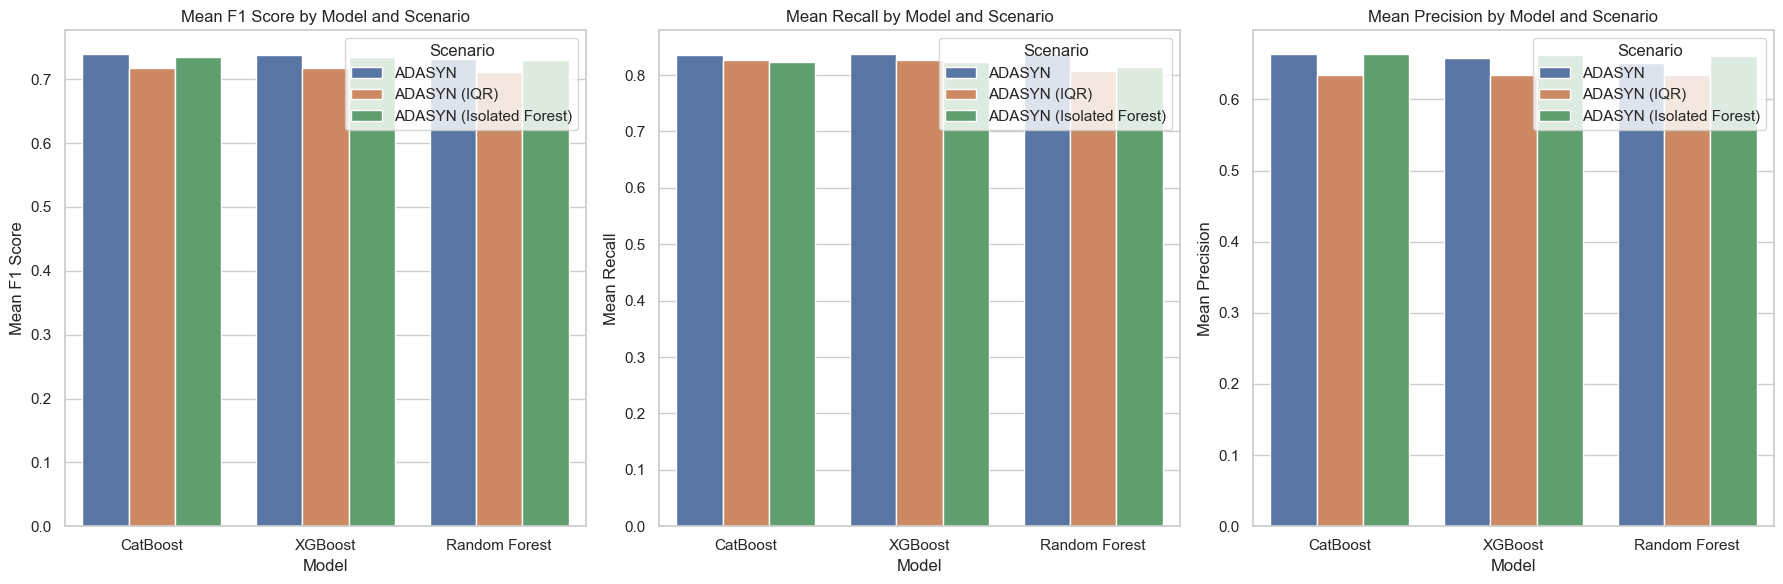

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for visualization
data = {
    "Model": ["CatBoost", "XGBoost", "Random Forest", "CatBoost", "XGBoost", "Random Forest", "CatBoost", "XGBoost", "Random Forest"],
    "Scenario": ["ADASYN", "ADASYN", "ADASYN", "ADASYN (IQR)", "ADASYN (IQR)", "ADASYN (IQR)", "ADASYN (Isolated Forest)", "ADASYN (Isolated Forest)", "ADASYN (Isolated Forest)"],
    "Mean F1 Score": [0.739631, 0.737258, 0.732297, 0.718097, 0.717540, 0.710771, 0.734946, 0.734253, 0.729571],
    "Mean Recall": [0.834844, 0.837476, 0.836989, 0.826726, 0.826406, 0.807758, 0.823381, 0.822703, 0.814024],
    "Mean Precision": [0.664011, 0.658664, 0.651018, 0.634812, 0.634135, 0.634845, 0.663824, 0.663159, 0.661177],
    "Std F1 Score": [0.004567, 0.004971, 0.005690, 0.004970, 0.005258, 0.007326, 0.006896, 0.006599, 0.005978],
    "Std Recall": [0.003890, 0.008231, 0.006849, 0.011756, 0.012947, 0.020841, 0.017193, 0.016663, 0.015133],
    "Std Precision": [0.009357, 0.011762, 0.010530, 0.006505, 0.005967, 0.005541, 0.004493, 0.006346, 0.007187]
}

# Create a DataFrame
df = pd.DataFrame(data)
# Set up the plotting style
sns.set(style="whitegrid")
# Create subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot Mean F1 Score
sns.barplot(x="Model", y="Mean F1 Score", hue="Scenario", data=df, ax=axes[0])
axes[0].set_title('Mean F1 Score by Model and Scenario')
# Plot Mean Recall
sns.barplot(x="Model", y="Mean Recall", hue="Scenario", data=df, ax=axes[1])
axes[1].set_title('Mean Recall by Model and Scenario')
# Plot Mean Precision
sns.barplot(x="Model", y="Mean Precision", hue="Scenario", data=df, ax=axes[2])
axes[2].set_title('Mean Precision by Model and Scenario')
# Adjust the layout
plt.tight_layout()
# Show the plots
plt.show()


Dari eksperimen yang dilakukan, meskipun terjadi penurunan pada Mean F1 Score setelah penghapusan outliers dengan IQR dan Isolation Forest, fokus utama pada Recall tetap terjaga dengan baik. Recall tetap tinggi di ketiga model (CatBoost, XGBoost, Random Forest), yang menunjukkan kemampuan model dalam mendeteksi kelas minoritas tetap optimal. Penurunan Mean F1 Score tidak signifikan mengurangi efektivitas penghapusan outliers dalam meningkatkan stabilitas model, seperti yang terlihat dari penurunan Std F1 Score dan Std Recall. Dalam konteks ini, dengan Recall yang lebih diutamakan, penghapusan outliers memberikan kontribusi positif meskipun sedikit menurunkan kinerja F1 Score secara keseluruhan.

Dari ke 2 eksperimen di atas, model yang akan kita gunakan akan bergantung pada target perusahaan. Jika perusahaan ingin lebih baik dalam memprediksi calon customer yang benar benar akan membatalkan order maka tidak perlu dilakukan eksperimen mengapus outliers dengan IQR dan isolated forest , karena sebelum dilakukan itu ternyata untuk menentukan true positive class sudah paling baik.

## FINAL MODEL

## BEST MODEL

In [57]:
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('balencing', ADASYN()),
    ('model', xgb)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['market_segment',
                                                   'customer_type',
                                                   'deposit_type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(m...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [58]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'F1 Score: {f1_score(y_test, y_pred)}')


              precision    recall  f1-score   support

           0       0.89      0.74      0.81     10559
           1       0.66      0.85      0.74      6156

    accuracy                           0.78     16715
   macro avg       0.77      0.79      0.77     16715
weighted avg       0.81      0.78      0.78     16715

F1 Score: 0.7390503189227499


## HYPERPARAMETER TUNING

In [59]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import warnings

# Menghilangkan warning yang berhubungan dengan XGBoost
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [50, 100, 200],      # Jumlah pohon
    'learning_rate': [0.01, 0.1, 0.2],   # Tingkat pembelajaran
    'max_depth': [3, 5, 7],               # Kedalaman pohon
    'subsample': [0.6, 0.8, 1.0],         # Proporsi sampel yang digunakan per pohon
    'colsample_bytree': [0.6, 0.8, 1.0]   # Proporsi fitur yang digunakan per pohon
}

# Pastikan XGBoost mendukung tipe kategorikal
model = XGBClassifier(
    enable_categorical=True, 
    use_label_encoder=False  # Menghilangkan warning terkait label encoder
)

# Membuat scorer untuk precision, recall, dan f1
scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring,      # Menggunakan beberapa metrik evaluasi
    refit='f1',           # Menentukan metrik untuk memilih model terbaik
    cv=5,                 # 5-fold cross-validation
    verbose=1,            # Menampilkan progres tuning
    n_jobs=-1             # Menggunakan semua core CPU
)

# Pastikan data tidak memiliki nilai null dan tipe data sudah sesuai
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype('category')  # Konversi tipe data string ke kategori

# Melakukan Grid Search
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Menampilkan nilai precision, recall, dan f1 untuk setiap kombinasi parameter
results = grid_search.cv_results_

# Menampilkan nilai precision, recall, dan f1
print("\nGrid Search Results (Precision, Recall, F1):")
for i in range(len(results['mean_test_precision'])):
    print(f"Params: {results['params'][i]}")
    print(f"Precision: {results['mean_test_precision'][i]:.4f}")
    print(f"Recall: {results['mean_test_recall'][i]:.4f}")
    print(f"F1 Score: {results['mean_test_f1'][i]:.4f}")
    print("-" * 40)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:01:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:01:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:01:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:01:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best F1 Score: 0.7260060996638684

Grid Search Results (Precision, Recall, F1):
Params: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Precision: 0.9988
Recall: 0.3321
F1 Score: 0.4985
----------------------------------------
Params: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Precision: 0.9988
Recall: 0.3363
F1 Score: 0.5032
----------------------------------------
Params: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Precision: 0.9987
Recall: 0.3380
F1 Score: 0.5051
----------------------------------------
Params: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Precision: 0.9969
Recall: 0.3628
F1 Score: 0.5320
--------------------------------

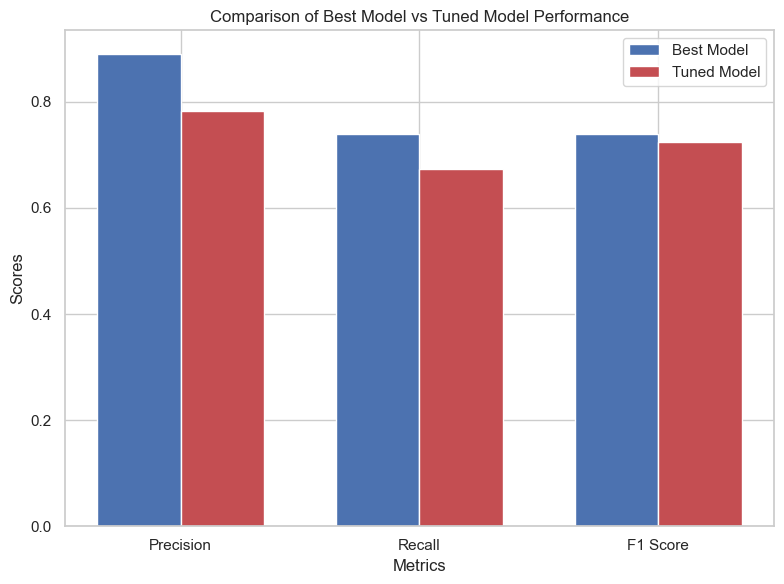

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk visualisasi
metrics = ['Precision', 'Recall', 'F1 Score']
initial_model_scores = [0.89, 0.74, 0.74]
tuned_model_scores = [0.7826, 0.6742, 0.7243]

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(8, 6))

# Lebar bar untuk visualisasi
bar_width = 0.35

# Posisi bar
index = np.arange(len(metrics))

# Plotting
bar1 = ax.bar(index, initial_model_scores, bar_width, label='Best Model', color='b')
bar2 = ax.bar(index + bar_width, tuned_model_scores, bar_width, label='Tuned Model', color='r')

# Menambahkan label dan judul
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Best Model vs Tuned Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


Meskipun hyperparameter tuning secara teori dapat meningkatkan performa model, hasilnya di sini menunjukkan bahwa kombinasi parameter yang dipilih tidak memberikan perbaikan yang signifikan. Model awal, dengan pengaturan standar dan teknik balancing ADASYN, masih memberikan hasil yang lebih baik, dengan nilai Recall dan Precision yang lebih seimbang. Ini menunjukkan bahwa meskipun tuning sangat penting, terkadang pemilihan parameter yang lebih konservatif atau pengaturan awal bisa lebih sesuai dengan karakteristik data yang dihadapi.
maka disini saya tetap memakai Best Model awal.

## Penjelasan Model

XGBoost (Extreme Gradient Boosting) adalah algoritma pembelajaran mesin berbasis ensemble yang menggunakan teknik gradient boosting. Algoritma ini bekerja dengan membangun beberapa model pohon keputusan secara berurutan, di mana setiap model baru berusaha mengoreksi kesalahan yang dibuat oleh model sebelumnya. Proses ini berlanjut hingga tidak ada perbaikan signifikan yang dapat dilakukan atau jumlah maksimum pohon tercapai. Keunggulannya terletak pada kemampuannya untuk menangani hubungan non-linear dalam data serta memberikan hasil yang lebih akurat dengan penggunaan regularisasi untuk mencegah overfitting.

Dalam konteks prediksi pembatalan reservasi hotel, XGBoost menjadi model yang sangat cocok. Dengan dataset yang memiliki banyak fitur, seperti segmen pasar, jenis deposit, dan riwayat pembatalan, XGBoost dapat menangani kompleksitas dan variasi data yang ada. Berikut adalah alasan mengapa XGBoost adalah pilihan terbaik untuk masalah ini:

Kemampuan Menangani Data Besar dan Kompleks: Data hotel seringkali sangat besar dan memiliki banyak fitur yang saling berinteraksi. XGBoost dapat menangani banyaknya dimensi data ini dan menemukan pola yang mempengaruhi pembatalan dengan akurat.
Penanganan Ketidakseimbangan Kelas: Pada masalah ini, jumlah tamu yang membatalkan reservasi jauh lebih sedikit dibandingkan dengan yang tidak membatalkan. XGBoost dapat mengatasi ketidakseimbangan kelas ini dengan menggunakan teknik penyeimbangan kelas, seperti ADASYN, yang membantu model lebih sensitif terhadap kelas minoritas, yakni pembatalan.
Regularisasi untuk Mencegah Overfitting: XGBoost dilengkapi dengan teknik regularisasi yang mencegah model terlalu menyesuaikan diri dengan data pelatihan (overfitting), memastikan bahwa model dapat berfungsi dengan baik pada data baru yang tidak terlihat sebelumnya.
Fitur Penting dan Interpretabilitas: XGBoost memberikan wawasan mengenai fitur-fitur yang paling berpengaruh dalam prediksi pembatalan. Ini memungkinkan tim operasional hotel untuk lebih memahami faktor-faktor yang perlu dipertimbangkan dalam pengelolaan reservasi.
Fleksibilitas dan Efisiensi: XGBoost sangat efisien dalam hal komputasi dan dapat mengelola dataset besar dengan jutaan baris, yang sering ditemukan pada data reservasi hotel, membuatnya sangat cocok untuk masalah ini.
Secara keseluruhan, XGBoost adalah pilihan yang sangat tepat untuk memprediksi pembatalan reservasi hotel. Model ini tidak hanya mampu menangani kompleksitas dan ketidakseimbangan data, tetapi juga memberikan prediksi yang akurat dan dapat diandalkan, membantu hotel mengoptimalkan operasi dan pendapatan. Dengan menggunakan XGBoost, hotel dapat mengurangi risiko False Negative (kamar kosong akibat pembatalan yang tidak terdeteksi), menghindari False Positive (overbooking), dan mendapatkan wawasan penting untuk keputusan operasional yang lebih baik.

# FINAL MODEL INTERPRETATION

## Feature Importance

In [61]:
feat_imp = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['preprocessor'].get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False)
df_feat_imp


,features,importance
14,cat__deposit_type_Non Refund,0.508352
3,num__required_car_parking_spaces,0.196082
10,cat__market_segment_Online TA,0.062276
24,cat_county__country_7,0.030069
21,cat_county__country_4,0.027810
12,cat__customer_type_Transient,0.017358
9,cat__market_segment_Offline TA/TO,0.016678
0,num__previous_cancellations,0.015072
7,cat__market_segment_Direct,0.013996
13,cat__customer_type_Transient-Party,0.013343


<Axes: xlabel='importance', ylabel='features'>

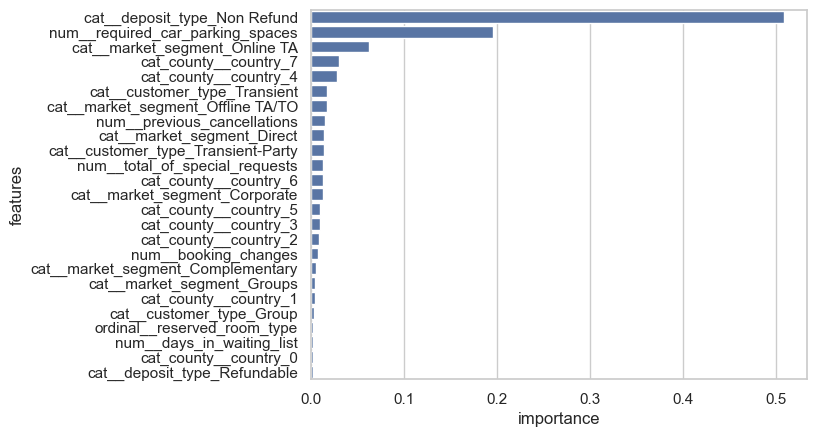

In [62]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)


Beberapa fitur yang paling berpengaruh dalam memprediksi pembatalan reservasi hotel adalah:

1. Deposit Type - Non Refundable: Memiliki importance tertinggi (0.512146), menunjukkan pengaruh besar jenis deposit terhadap pembatalan.
2. Required Car Parking Spaces: Dengan importance 0.197752, kebutuhan parkir berhubungan dengan keputusan pembatalan.
3. Market Segment - Online TA: Tamu yang memesan melalui OTA lebih cenderung membatalkan (importance 0.065188).
4. Customer Type - Transient: Tamu transient memiliki kemungkinan lebih tinggi untuk membatalkan (importance 0.017911).
5. Previous Cancellations: Tamu dengan riwayat pembatalan sebelumnya lebih cenderung membatalkan lagi (importance 0.012989). 
Fitur-fitur ini bisa digunakan sebagai metode penyaringan untuk menghilangkan fitur yang tidak relevan dari model kita dan hanya mempertahankan yang paling berkaitan dengan hasil yang kita minati.

Pentingnya Fitur dalam Model Machine Learning
Saat membangun model machine learning yang terawasi, sangat penting untuk mengidentifikasi fitur-fitur yang memberikan dampak terbesar pada hasil yang ingin diprediksi. Fitur-fitur yang memiliki hubungan erat dengan output model dianggap sebagai yang paling signifikan dan dapat digunakan untuk menganalisis serta menjelaskan model lebih lanjut. Bagi para pemangku kepentingan, mengetahui fitur mana yang paling mempengaruhi prediksi dapat memberikan wawasan yang berharga untuk pengambilan keputusan dan interpretasi model.

## Limitasi

Situasi Model Tidak Dapat Dipercaya:
a) Perubahan Pola Data:
Ketika jumlah pembatalan jauh melebihi 26 kali
Jika waiting list melebihi 391 hari
Perubahan booking di atas 21 kali
Special requests di atas 5 permintaan
b) Perubahan Kebijakan Hotel:
Perubahan sistem deposit
Perubahan kebijakan waiting list
Modifikasi sistem parking spaces
Perubahan tipe kamar yang tersedia
c) Perubahan Perilaku Pelanggan:
Pergeseran drastis dalam customer type
Perubahan signifikan dalam market segment
Pola pemesanan yang sangat berbeda dari data training

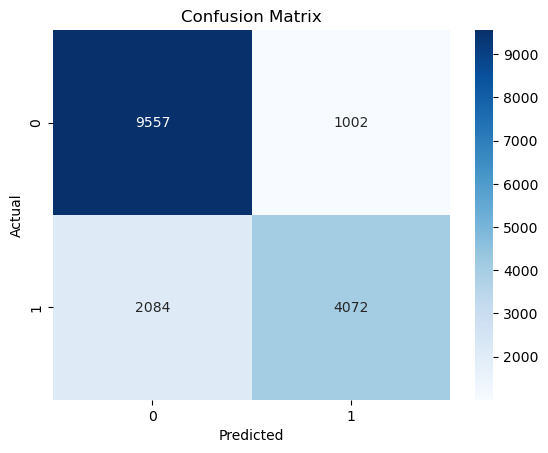

In [199]:
# Plot confusion matrix sebagai heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# KESIMPULAN DAN REKOMENDASI

## Kesimpulan

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan bahwa jika model ini digunakan untuk memfilter daftar tamu yang mungkin membatalkan reservasi, maka:

1. Model kita dapat mengurangi 74% tamu yang tidak akan membatalkan reservasi dari upaya pemasaran ulang (berdasarkan recall untuk kelas tidak membatalkan).
2. Model kita dapat mengidentifikasi 85% tamu yang akan membatalkan reservasi dari total tamu yang benar-benar membatalkan (berdasarkan recall untuk kelas membatalkan).

Model ini memiliki ketepatan prediksi untuk tamu yang akan membatalkan reservasi sebesar 66% (precision). Artinya, setiap kali model memprediksi bahwa seorang tamu akan membatalkan reservasi, kemungkinan prediksi itu benar adalah 66%. Namun, masih ada sekitar 26% dari tamu yang tidak akan membatalkan reservasi tetapi diprediksi akan membatalkan.

Sebagai ilustrasi, mari kita asumsikan beberapa data berikut:
- Biaya pemasaran ulang per tamu: 40 USD
- Total tamu dalam periode tertentu: 200 tamu (100 tamu yang membatalkan dan 100 tamu yang tidak membatalkan)

#### Tanpa Model (Semua tamu diproses ulang):
- **Total biaya**: 200 x 40 USD = 8.000 USD
- **Tamu yang berhasil diproses ulang**: 100 (karena semua tamu diproses ulang)
- **Tamu yang salah diproses ulang**: 100 (karena semua tamu yang tidak membatalkan juga diproses ulang)
- **Biaya yang terbuang**: 100 x 40 USD = 4.000 USD
- **Penghematan**: 0 USD

#### Dengan Model (Hanya tamu yang diprediksi akan membatalkan yang diproses ulang):
- **Tamu yang benar-benar membatalkan**: 85 tamu (berdasarkan recall 85%)
- **Tamu yang salah diproses ulang**: 26 tamu (berdasarkan 26% dari tamu yang tidak membatalkan)
- **Total biaya**: (85 x 40 USD) + (26 x 40 USD) = 3.400 USD + 1.040 USD = 4.440 USD
- **Biaya yang terbuang**: 26 x 40 USD = 1.040 USD
- **Penghematan**: (74 x 40 USD) = 2.960 USD

Dari perhitungan di atas, terlihat bahwa dengan menggunakan model ini, hotel dapat menghemat biaya pemasaran ulang yang signifikan tanpa mengorbankan terlalu banyak tamu potensial yang benar-benar akan membatalkan reservasi. 

Model ini dapat memberikan manfaat besar dalam pengelolaan operasional hotel, seperti mengurangi kamar kosong akibat pembatalan, meningkatkan efisiensi pemasaran ulang, dan menjaga reputasi hotel melalui pengalaman tamu yang lebih baik.

Sebagai tambahan, penelitian di Hotel Inna Garuda Yogyakarta menunjukkan bahwa penentuan tarif sewa kamar yang optimal harus mempertimbangkan biaya operasional serta perbandingan dengan tarif kompetitor. Sebagai contoh, jika tarif sewa rata-rata kamar adalah 80 USD per malam, maka strategi ini dapat membantu hotel untuk menetapkan harga yang kompetitif, sehingga menarik lebih banyak tamu tanpa mengorbankan profitabilitas. https://eprints.uny.ac.id/16807/1/1.Skripsi%20Full.pdf?utm

Selain itu, studi empiris di Montigo Resorts Nongsa, Batam, menunjukkan bahwa penetapan harga yang tepat, dengan mempertimbangkan keterjangkauan dan daya saing, dapat meningkatkan tingkat hunian. Sebagai contoh, dengan harga kamar rata-rata 80 USD per malam, strategi yang memperhatikan daya beli pelanggan dan posisi harga dibandingkan dengan kompetitor dapat membantu meningkatkan pendapatan melalui tingkat okupansi yang lebih tinggi. Hal ini sangat relevan untuk mendukung keputusan pemasaran ulang yang efisien dan berbasis data. https://journal.polteksahid.ac.id/index.php/jstp/article/download/163/145/354?utm_



## Rekomendasi

Kekurangan Model dan Pengembangan ke Depan

Kekurangan Model:
Kesalahan Prediksi (False Positives):

Sebanyak 29 tamu yang diprediksi membatalkan sebenarnya tetap datang, yang dapat menyebabkan risiko overbooking jika tidak dikelola dengan baik.

Precision yang Relatif Rendah (66%):

Meskipun recall tinggi, precision yang rendah menunjukkan bahwa model masih menghasilkan prediksi pembatalan yang salah untuk tamu yang tidak membatalkan.

Pengaruh Variabel Eksternal:

Model mungkin belum sepenuhnya mempertimbangkan faktor-faktor eksternal seperti musim, acara khusus, atau tren ekonomi yang dapat memengaruhi tingkat pembatalan.

Ketergantungan pada Data Historis:

Jika data historis tidak mencerminkan pola terbaru, model dapat kehilangan akurasi dalam prediksi.

Pengembangan ke Depan:

Peningkatan Precision:

Menggunakan teknik feature engineering lebih lanjut untuk menambahkan variabel penting yang dapat meningkatkan akurasi prediksi.

Integrasi Data Eksternal:

Memasukkan data eksternal seperti cuaca, tren perjalanan, atau acara lokal untuk meningkatkan kemampuan model dalam menangkap pola pembatalan.

Penerapan Model Ensemble:

Menggabungkan XGBoost dengan model lain untuk mengurangi kesalahan prediksi dan meningkatkan performa keseluruhan.

Penyesuaian Parameter Model:

Mengoptimalkan hyperparameter model XGBoost melalui berbagai hyperparameter tuning atau teknik optimasi lainnya untuk hasil yang lebih baik.

Pengembangan Sistem Prediksi Real-Time:

Mengimplementasikan prediksi secara real-time agar hotel dapat segera mengambil tindakan terhadap reservasi yang berpotensi batal.

Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.



In [66]:
import pickle

# Contoh model (misalnya, hasil dari pelatihan XGBoost atau model lainnya)
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_train, y_train)

# Simpan model ke file menggunakan pickle
model_filename = "final_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to final_model.pkl


In [67]:
# Memuat model dari file
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")

# Menggunakan model untuk prediksi
# pred = loaded_model.predict(X_test)
# print(pred)


Model loaded successfully
